# **1. Load Data**

In [1]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Customer-Purchase-Behavior/Dataset/Retail-Transactional-Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

# **2. Clean Data**

## **2.1. Irrelevant data**

---
1. Transaction_ID, Name, Email, Phone, Address, Zipcode là những cột dữ liệu, thông tin không cần thiết cho việc phân tích bài toán --> Xoá những cột này.
2. City và State cũng là những cột cần xoá vì đã có cột Country để phân tích tổng quan. Tuy nhiên sẽ được xoá sau vì nhận thấy dữ liệu cột Country có giá trị null, và có thể được suy ra từ City và State.
---

In [5]:
# Xoá những cột không cần thiết cho bài toán
df_retail = df.drop(['Transaction_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode', 'Order_Status'], axis = 1).copy()

df_retail.rename(columns = {'products': 'Product'}, inplace = True)

---
1. **Customer_ID:** Mã định danh cho từng khách hàng.
2. **City:** Thành phố nơi khách hàng cư trú.
3. **State:** Tiểu bang nơi khách hàng cư trú.
4. **Country:** Quốc gia nơi khách hàng cư trú.
5. **Age:** Độ tuổi của khách hàng.
6. **Gender:** Giới tính của khách hàng.
7. **Income:** Thu nhập của khách hàng (Low, Medium, High).
8. **Customer_Segment:** Phân khúc khách hàng (Premium, Regular, New).
9. **Date, Year, Month, Time:** Thời gian mua hàng.
10. **Total_Purchases:** Tổng số lượng sản phẩm đã mua.
11. **Amount:** Đơn giá của sản phẩm.
12. **Total_Amount:** Tổng số tiền đã chi trả.
13. **Product_Brand:** Nhãn hàng của sản phẩm.
14. **Product_Category:** Danh mục của sản phẩm.
15. **Product_Type:** Loại sản phẩm.
16. **Product:** Sản phẩm đã mua.
17. **Shipping_Method:** Phương thức vận chuyển (Same-Day, Standard, Express).
18. **Payment_Method:** Phương thức thanh toán (Cash, Credit Card, Debit Card, PayPal).
19. **Feedback:** Đánh giá của khách hàng về quá trình mua hàng (Bad, Average, Good, Excellent).
20. **Ratings:** Đánh giá của khách hàng về sản phẩm (1 -> 5).
---

In [6]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       301702 non-null  float64
 1   City              301762 non-null  object 
 2   State             301729 non-null  object 
 3   Country           301739 non-null  object 
 4   Age               301837 non-null  float64
 5   Gender            301693 non-null  object 
 6   Income            301720 non-null  object 
 7   Customer_Segment  301795 non-null  object 
 8   Date              301651 non-null  object 
 9   Year              301660 non-null  float64
 10  Month             301737 non-null  object 
 11  Time              301660 non-null  object 
 12  Total_Purchases   301649 non-null  float64
 13  Amount            301653 non-null  float64
 14  Total_Amount      301660 non-null  float64
 15  Product_Category  301727 non-null  object 
 16  Product_Brand     30

In [7]:
pd.set_option('display.max_columns', None)
df_retail.head()

,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product
0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5.0,Cycling shorts
1,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4.0,Lenovo Tab
2,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2.0,Sports equipment
3,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4.0,Utility knife
4,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1.0,Chocolate cookies


## **2.2. Missing values & Data type**

In [8]:
df_retail.dtypes

,0
Customer_ID,float64
City,object
State,object
Country,object
Age,float64
Gender,object
Income,object
Customer_Segment,object
Date,object
Year,float64


---
**Data Type:**
1. Customer_ID nên là kiểu object thay vì float.
2. Age, Year, Total_Purchases và Ratings nên đổi thành kiểu int thay vì float.
3. Date bị sai kiểu dữ liệu, cần đổi về kiểu datetime.
---

In [9]:
# Tạo hàm tính NULL rate
def calc_null_rate(df):
    new_df = df.isnull().sum().to_frame('null_count')
    new_df[['null_rate']] = new_df[['null_count']] / len(df)
    return new_df.sort_values(by = ['null_count'], ascending = False)

In [10]:
calc_null_rate(df_retail)

,null_count,null_rate
Total_Purchases,361,0.001195
Date,359,0.001189
Amount,357,0.001182
Time,350,0.001159
Total_Amount,350,0.001159
Year,350,0.001159
Shipping_Method,337,0.001116
Gender,317,0.001050
Customer_ID,308,0.001020
Payment_Method,297,0.000983


---
**Missing values**
1. Total_Purchases, Amount, Total_Amount:
    - Xoá dòng đó nếu có >= 2 cột null.
    - Tính lại giá trị null nếu 2 cột còn lại không null với Total_Amount = Total_Purchases * Amount.
2. Date, Year, Month:
    - Xoá dòng đó nếu có >= 2 cột null.
    - Nếu giá trị Date null, Year và Month không null thì Date sẽ là ngày đầu tiên (01) trong Month và Year đó.
    - Nếu Date không null, thì Year và Month sẽ được suy ra từ Date. **Tuy nhiên, cần kiểm tra tính chính xác của cột Year và Month so với cột Date trước khi tính toán.**
3. Feedback:
    - Lấy giá trị có tần suất xuất hiện nhiều nhất để điền vào các giá trị null.
4. Time, Shipping_Method, Payment_Method, Gender, Income, Customer_Segment:
    - Thay giá trị null thành 'Unknown'.
    - Tuy nhiên, trong tập dữ liệu này, các giá trị null này chỉ chiếm một lượng rất ít so với tổng thể. Do đó, việc xoá đi các dòng này sẽ không làm ảnh hưởng đến quá trình phân tích bài toán.
5. Customer_ID:
    - Xoá dòng đó.
6. Product_Category, Product_Brand:
    - Thay giá trị null dựa vào sự liên quan giữa Product_Category, Product_Brand, Product_Type và Product. **Cần kiểm tra sự liên quan giữa các cột này.**
7. Country, State, City:
    - Nếu Country null và (State hoặc City null) thì xoá dòng đó.
    - Thay giá trị null của Country dựa vào City và State
    - Xoá 2 cột State và City vì chỉ cần phân tích tổng quan về Country.
8. Age, Ratings:
    - Lấy giá trị trung bình để điền vào các giá trị null.
---

In [11]:
# Total_Purchases, Amount, Total_Amount

# Xoá các dòng có >= 2 cột null
df_retail.drop(df_retail[df_retail[['Total_Purchases', 'Amount', 'Total_Amount']].isna().sum(axis = 1) > 1].index
               , inplace = True)
df_retail.reset_index(drop = True, inplace = True)

# Tính giá trị null với Total_Amount = Total_Purchases * Amount
df_retail['Total_Amount'] = df_retail['Total_Amount'].fillna(df_retail['Total_Purchases'] * df_retail['Amount'])
df_retail['Amount'] = df_retail['Amount'].fillna(df_retail['Total_Amount'] / df_retail['Total_Purchases'])
df_retail['Total_Purchases'] = df_retail['Total_Purchases'].fillna(df_retail['Total_Amount'] / df_retail['Amount'])

# Thay đổi kiểu dữ liệu cho Total_Purchases
df_retail['Total_Purchases'] = df_retail['Total_Purchases'].astype('int64')

In [12]:
# Date, Year, Month

# Xoá các dòng có >= 2 cột null
df_retail.drop(df_retail[df_retail[['Date', 'Year', 'Month']].isnull().sum(axis = 1) > 1].index
               , inplace = True)
df_retail.reset_index(drop = True, inplace = True)

# Thay đổi định dạng của Date
df_retail['Date'] = pd.to_datetime(df_retail['Date'])

In [13]:
# Date, Year, Month

# Kiểm tra tính chính xác của Year và Month so với Date (lấy cột Date làm chuẩn)
df_date = df_retail[['Date', 'Year', 'Month']].copy()
df_date['Month1'] = pd.to_datetime(df_date['Month'], format = '%B').dt.month
df_date['Year2'] = df_date['Date'].dt.year
df_date['Month2'] = df_date['Date'].dt.month

check_month = len(df_date[((df_date['Date'].isna() == False) & (df_date['Month'].isnull() == False))
        & (df_date['Month1'] != df_date['Month2'])])
check_year = len(df_date[((df_date['Date'].isna() == False) & (df_date['Year'].isnull() == False))
        & (df_date['Year'] != df_date['Year2'])])

print(check_month, check_year)

73196 0


---
1. Giá trị cột Month có đến 73196 giá trị khác so với cột Date --> Xoá cột Month hiện tại, thay bằng cột Month mới từ cột Date.
2. Giá trị cột Year đã khớp với cột Date --> giữ nguyên, chỉ cần tính các giá trị null từ cột Date.
---

In [14]:
# Date, Year, Month

# Tính giá trị null của Year và thay đổi kiểu dữ liệu
df_retail['Year'] = df_retail['Year'].fillna(df_date['Date'].dt.year).astype('int')

# Tính giá trị null của Date dựa vào Month và Year
null_date = df_retail.loc[df_retail['Date'].isnull()][['Date', 'Year', 'Month']].copy()
null_date['Year'] = null_date['Year'].astype('str')
null_date['Month'] = pd.to_datetime(null_date['Month'], format = '%B').dt.strftime('%m').astype('str')
null_date['Date'] = pd.to_datetime(null_date['Year'] + '-' + null_date['Month'] + '-01')

df_retail.loc[null_date.index, 'Date'] = null_date['Date']

# Tính giá trị null của Month
df_retail['Month'] = df_retail['Date'].dt.month_name()

In [15]:
# Date, Year, Month

# Kiểm tra các giá trị ngoài khoảng Date
len(df_retail[(df_retail['Date'] < '2023-03-01') | (df_retail['Date'] > '2024-02-29')])

33

---
1. Vì bài toán chỉ yêu cầu phân tích từ 2023-03-01 đến 2024-02-29, nên những dữ liệu có Date nằm ngoài khoảng này sẽ được xoá để đảm bảo tính chính xác của bài toán.
---

In [16]:
# Date, Year, Month

# Xoá các dòng ngoài khoảng Date
df_retail.drop(df_retail[(df_retail['Date'] < '2023-03-01') | (df_retail['Date'] > '2024-02-29')].index, inplace = True)
df_retail.reset_index(drop = True, inplace = True)

In [17]:
# Feedback

# Thay bằng giá trị có tần suất xuất hiện nhiều nhất
df_retail['Feedback'] = df_retail['Feedback'].fillna(df_retail['Feedback'].mode().iloc[0])

In [18]:
# Time, Shipping_Method, Payment_Method, Gender, Income, Customer_Segment

# Xoá dòng null
cols = ['Time', 'Shipping_Method', 'Payment_Method', 'Gender', 'Income', 'Customer_Segment']
for col in cols:
    df_retail.drop(df_retail[df_retail[col].isnull() == True].index, inplace = True)
    df_retail.reset_index(drop = True, inplace = True)

In [19]:
# Customer_ID

# Xoá dòng null
df_retail.drop(df_retail[df_retail['Customer_ID'].isnull() == True].index, inplace = True)
df_retail.reset_index(drop = True, inplace = True)

# Thay đổi kiểu dữ liệu cho Total_Purchases
df_retail['Customer_ID'] = df_retail['Customer_ID'].astype('int').astype('object')

In [20]:
# Product_Category, Product_Brand

# Kiểm tra sự liên quan giữa các cột Product_Category, Product_Brand, Product_Type và Product
df_products = df_retail[['Product', 'Product_Type', 'Product_Category', 'Product_Brand']].copy()
df_products = df_products.drop_duplicates().reset_index(drop = True)
df_products = df_products[(df_products['Product_Category'].isnull() == False)
                        & (df_products['Product_Brand'].isnull() == False)].reset_index(drop = True)

check_product_category = df_products[['Product', 'Product_Category']].drop_duplicates()['Product'].value_counts().max()
check_product_brand = df_products[['Product', 'Product_Brand']].drop_duplicates()['Product'].value_counts().max()

print(check_product_category, check_product_brand)

# Tạo dataframe chứa tần suất xuất hiện nhiều nhất của Product_Brand trong từng Product
df_product_mode = df_retail[['Product', 'Product_Type', 'Product_Category', 'Product_Brand']].copy()
df_product_mode = df_product_mode[(df_product_mode['Product_Category'].isnull() == False)
                                & (df_product_mode['Product_Brand'].isnull() == False)].reset_index(drop = True)
df_product_mode = df_product_mode.groupby(by = ['Product', 'Product_Type', 'Product_Category', 'Product_Brand']
                                        ).size().reset_index(name = 'Count')
df_product_mode = df_product_mode.loc[df_product_mode.groupby(['Product', 'Product_Type', 'Product_Category']
                                                            )['Count'].idxmax()].reset_index(drop = True)

1 3


---
1. Mỗi Product sẽ chỉ tương ứng với một Product_Category duy nhất --> Thay giá trị null bằng giá trị tương ứng với cột Product.
2. Mỗi Product có thể ứng với nhiều Product_Brand khác nhau --> Thay giá trị null bằng Product_Brand có tần suất xuất hiện nhiều nhất ứng với từng Product đó.
---

In [21]:
# Product_Category, Product_Brand

# Thay giá trị Product_Category tương ứng với cột Product
null_category = df_retail.loc[df_retail['Product_Category'].isnull()][['Product']]
null_category = null_category.join(df_products[['Product', 'Product_Category']]
                                   .drop_duplicates()
                                   .set_index('Product')
                                   , on = 'Product')

df_retail.loc[null_category.index, 'Product_Category'] = null_category['Product_Category']

# Thay giá trị Product_Brand tương ứng với cột Product
null_brand = df_retail.loc[df_retail['Product_Brand'].isnull()][['Product', 'Product_Type', 'Product_Category']]
null_brand = null_brand.join(df_product_mode.drop(columns = 'Count')
                                            .drop_duplicates()
                                            .set_index(['Product', 'Product_Type', 'Product_Category'])
                            , on = ['Product', 'Product_Type', 'Product_Category'])

df_retail.loc[null_brand.index, 'Product_Brand'] = null_brand['Product_Brand']

In [22]:
# State, Country, City

# Xoá các dòng có >= 2 cột null (bao gồm Country)
df_retail.drop(df_retail[(df_retail[['State', 'Country']].isnull().sum(axis = 1) > 1)
                        | (df_retail[['City', 'Country']].isnull().sum(axis = 1) > 1)].index
               , inplace = True)
df_retail.reset_index(drop = True, inplace = True)

# Thay giá trị null của Country dựa vào State và City
df_geographic = df_retail[['City', 'State', 'Country']].copy()
df_geographic = df_geographic.drop_duplicates().reset_index(drop = True)
df_geographic = df_geographic[(df_geographic['State'].isnull() == False)
                            & (df_geographic['City'].isnull() == False)
                            & (df_geographic['Country'].isnull() == False)].reset_index(drop = True)

null_country = df_retail.loc[df_retail['Country'].isnull()][['City', 'State']]
null_country = null_country.join(df_geographic.set_index(['City', 'State']), on = ['City', 'State'])

df_retail.loc[null_country.index, 'Country'] = null_country['Country']

# Xoá 2 cột City và State
df_retail.drop(columns = ['City', 'State'], inplace = True)

In [23]:
# Age, Ratings

# Thay giá trị null bằng giá trị trung bình của cột đó + Thay kiểu dữ liệu
df_retail['Age'] = df_retail['Age'].fillna(df_retail['Age'].mean()).astype('int')
df_retail['Ratings'] = df_retail['Ratings'].fillna(df_retail['Ratings'].mean()).astype('int')

In [24]:
calc_null_rate(df_retail)

,null_count,null_rate
Customer_ID,0,0.0
Amount,0,0.0
Ratings,0,0.0
Payment_Method,0,0.0
Shipping_Method,0,0.0
Feedback,0,0.0
Product_Type,0,0.0
Product_Brand,0,0.0
Product_Category,0,0.0
Total_Amount,0,0.0


In [25]:
df_retail.dtypes

,0
Customer_ID,object
Country,object
Age,int64
Gender,object
Income,object
Customer_Segment,object
Date,datetime64[ns]
Year,int64
Month,object
Time,object


## **2.3. Duplicate data**

In [26]:
df_retail['Customer_ID'].nunique()

86711

In [27]:
df_retail['Customer_ID'].value_counts().head()

,count
Customer_ID,
99355,13
60341,13
49274,13
47382,13
90983,13


In [28]:
df_retail[df_retail['Customer_ID'] == df_retail['Customer_ID'].value_counts().index[0]]

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product
11107,99355,UK,19,Female,Medium,Regular,2023-06-22,2023,June,13:09:02,5,27.871163,139.355813,Books,Random House,Literature,Excellent,Express,Debit Card,4,Non-fiction literature
15358,99355,UK,19,Male,Medium,Regular,2024-01-12,2024,January,8:42:55,4,271.926212,1087.704849,Grocery,Pepsi,Water,Excellent,Standard,Credit Card,5,Flavored water
23314,99355,Germany,22,Female,Medium,Regular,2024-02-13,2024,February,11:24:07,3,162.972213,488.916640,Home Decor,IKEA,Lighting,Average,Express,Credit Card,2,Track lighting
41401,99355,USA,22,Male,Low,Regular,2023-08-19,2023,August,21:10:13,3,461.213469,1383.640406,Home Decor,IKEA,Lighting,Good,Express,Credit Card,4,Ceiling lights
44029,99355,Australia,20,Male,Low,Regular,2023-07-07,2023,July,15:28:57,6,300.189314,1801.135883,Home Decor,IKEA,Decorations,Excellent,Standard,Credit Card,4,Wall art
73349,99355,USA,20,Male,Low,Premium,2024-01-25,2024,January,12:42:49,6,126.947042,761.682252,Grocery,Coca-Cola,Soft Drink,Excellent,Express,Debit Card,4,Fruit punch
140358,99355,USA,26,Male,High,Regular,2024-01-31,2024,January,9:58:06,2,319.093672,638.187344,Electronics,Whirepool,Fridge,Good,Standard,Cash,4,Side-by-side refrigerator
159570,99355,USA,23,Male,High,Regular,2023-09-18,2023,September,19:09:38,1,93.859097,93.859097,Clothing,Nike,Shorts,Excellent,Same-Day,Credit Card,4,Denim shorts
164720,99355,USA,23,Female,Medium,New,2023-06-29,2023,June,16:12:09,5,169.033013,845.165062,Home Decor,Bed Bath & Beyond,Bathroom,Excellent,Same-Day,Credit Card,5,Shower
197656,99355,UK,29,Male,Low,Regular,2024-01-17,2024,January,5:40:22,2,493.254912,986.509824,Electronics,Sony,Headphones,Bad,Express,Credit Card,1,Sports headphones


---
1. Mặc dù Customer_ID là giá trị định danh duy nhất cho từng khách hàng, nhưng do đây chỉ là một tập dữ liệu mô phỏng nên có nhiều giá trị của Customer_ID đã được gán cho nhiều khách hàng khác nhau.
2. Không có bảng Customers nào để làm chuẩn cho thông tin của khách hàng. Do đó, quyết định bỏ qua tính chính xác của cột Customer_ID, xem mỗi khách hàng chỉ mua 1 lần, không phân tích tỷ lệ giữ chân khách hàng (retention rate).
---

In [29]:
df_retail[df_retail.duplicated() == True]

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product
297633,20103,Canada,54,Female,Low,Regular,2023-12-10,2023,December,1:09:09,7,134.374182,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,1,Off-the-shoulder tee
298956,29920,Australia,54,Male,Low,New,2023-12-19,2023,December,11:33:48,6,366.928013,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,4,Fruit punch
299224,25416,UK,63,Male,Low,Regular,2023-05-05,2023,May,4:17:21,8,191.906886,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,2,Varsity jacket
299348,49598,Germany,59,Male,Low,New,2023-11-23,2023,November,15:35:49,9,272.327418,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,1,Iced tea
299693,77684,Germany,41,Male,Medium,Regular,2023-05-25,2023,May,9:24:18,5,272.306552,1361.532759,Clothing,Zara,Jeans,Excellent,Standard,Cash,4,Skinny jeans


---
1. Tồn tại 5 dòng có dữ liệu bị trùng lặp với những dòng khác --> Xoá những dòng này.
---

In [30]:
# Xoá những dòng bị trùng lặp
df_retail.drop_duplicates(inplace = True)
df_retail.reset_index(drop = True, inplace = True)

In [31]:
len(df_retail[df_retail.duplicated() == True])

0

## **2.4. Inconsistent data**

In [32]:
for col in df_retail.columns:
    print(col, ' ', df_retail[col].nunique(), ' ', list(df_retail[df_retail[col].duplicated() == False][col].head()))

Customer_ID   86711   [37249, 69749, 30192, 62101, 27901]
Country   5   ['Germany', 'UK', 'Australia', 'Canada', 'USA']
Age   53   [21, 19, 48, 56, 22]
Gender   2   ['Male', 'Female']
Income   3   ['Low', 'High', 'Medium']
Customer_Segment   3   ['Regular', 'Premium', 'New']
Date   366   [Timestamp('2023-09-18 00:00:00'), Timestamp('2023-12-31 00:00:00'), Timestamp('2023-04-26 00:00:00'), Timestamp('2023-05-08 00:00:00'), Timestamp('2024-01-10 00:00:00')]
Year   2   [2023, 2024]
Month   12   ['September', 'December', 'April', 'May', 'January']
Time   83620   ['22:03:55', '8:42:04', '4:06:29', '14:55:17', '16:54:07']
Total_Purchases   10   [3, 2, 7, 4, 1]
Amount   297525   [108.0287567, 403.3539073, 354.4775997, 352.4077173, 124.2765245]
Total_Amount   297529   [324.08627, 806.7078147, 1063.432799, 2466.854021, 248.5530491]
Product_Category   5   ['Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery']
Product_Brand   18   ['Nike', 'Samsung', 'Penguin Books', 'Home Depot', 'Nestle'

---
1. Country:
    - Định dạng không nhất quán: Có những giá trị như 'Germany' thì viết đầy đủ, trong khi có những giá trị thì viết tắt như 'UK'.
    - Chuyển các giá trị đang viết tắt thành đầy đủ.
2. Time:
    - Định dạng không nhất quán.
    - Chuyển về định dạng '%H:%M:%S'.
---

In [33]:
# Country
df_retail['Country'] = df_retail['Country'].replace({'UK': 'United Kingdom', 'USA': 'United States'})

# Time
df_retail['Time'] = pd.to_datetime(df_retail['Time'], format = '%H:%M:%S').dt.strftime('%H:%M:%S')

In [34]:
df_retail

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product
0,37249,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5,Cycling shorts
1,69749,United Kingdom,19,Female,Low,Premium,2023-12-31,2023,December,08:42:04,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4,Lenovo Tab
2,30192,Australia,48,Male,Low,Regular,2023-04-26,2023,April,04:06:29,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2,Sports equipment
3,62101,Canada,56,Male,High,Premium,2023-05-08,2023,May,14:55:17,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4,Utility knife
4,27901,United Kingdom,22,Male,Low,Premium,2024-01-10,2024,January,16:54:07,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299857,12104,Australia,31,Male,Medium,Regular,2024-01-20,2024,January,23:40:29,5,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,1,Historical fiction
299858,69772,Germany,35,Female,Low,New,2023-12-28,2023,December,02:55:45,1,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,5,LG Gram
299859,28449,United Kingdom,41,Male,Low,Premium,2024-02-27,2024,February,02:43:49,3,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,2,Parka
299860,45477,Canada,41,Male,Medium,New,2023-09-03,2023,September,11:20:31,1,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,4,TV stand


In [35]:
df_retail.describe()

,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,299862.000000,299862,299862.000000,299862.000000,299862.000000,299862.000000,299862.000000
mean,35.473971,2023-08-30 15:37:53.437781248,2023.165056,5.358862,255.136377,1367.422528,3.162308
min,18.000000,2023-03-01 00:00:00,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,22.000000,2023-05-31 00:00:00,2023.000000,3.000000,132.852417,438.743200,2.000000
50%,32.000000,2023-08-31 00:00:00,2023.000000,5.000000,255.439963,1040.859940,3.000000
75%,46.000000,2023-11-30 00:00:00,2023.000000,8.000000,377.620938,2029.369540,4.000000
max,70.000000,2024-02-29 00:00:00,2024.000000,10.000000,499.997911,4999.625796,5.000000
std,15.016018,NaN,0.371232,2.868426,141.393538,1128.811008,1.320413


# **3. Analyze**

In [36]:
print('Income: ', list(df_retail[df_retail['Income'].duplicated() == False]['Income']))
print('Customer Segment: ', list(df_retail[df_retail['Customer_Segment'].duplicated() == False]['Customer_Segment']))
print('Feedback: ', list(df_retail[df_retail['Feedback'].duplicated() == False]['Feedback']))

Income:  ['Low', 'High', 'Medium']
Customer Segment:  ['Regular', 'Premium', 'New']
Feedback:  ['Excellent', 'Average', 'Bad', 'Good']


In [37]:
income_order = ['Low', 'Medium', 'High']
df_retail['Income'] = pd.Categorical(df_retail['Income'], categories = income_order, ordered = True)

customer_segment_order = ['New', 'Regular', 'Premium']
df_retail['Customer_Segment'] = pd.Categorical(df_retail['Customer_Segment'], categories = customer_segment_order, ordered = True)

feedback_order = ['Bad', 'Average', 'Good', 'Excellent']
df_retail['Feedback'] = pd.Categorical(df_retail['Feedback'], categories = feedback_order, ordered = True)

## **3.1. Customer Portrait**

### **Age and Gender Distribution**

In [38]:
df_customers = df_retail[['Customer_ID', 'Age', 'Gender']].copy()

In [39]:
df_customers

,Customer_ID,Age,Gender
0,37249,21,Male
1,69749,19,Female
2,30192,48,Male
3,62101,56,Male
4,27901,22,Male
...,...,...,...
299857,12104,31,Male
299858,69772,35,Female
299859,28449,41,Male
299860,45477,41,Male


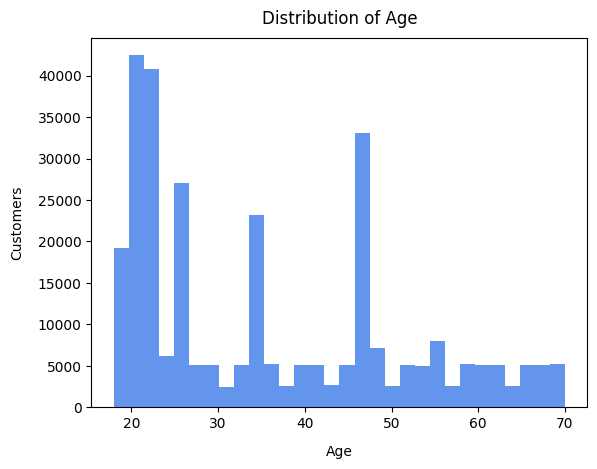

In [40]:
df_customers['Age'].hist(bins = 30, color = 'cornflowerblue', grid = False)

plt.title('Distribution of Age', pad = 10)
plt.xlabel('Age', labelpad = 10)
plt.ylabel('Customers', labelpad = 10)
plt.show()

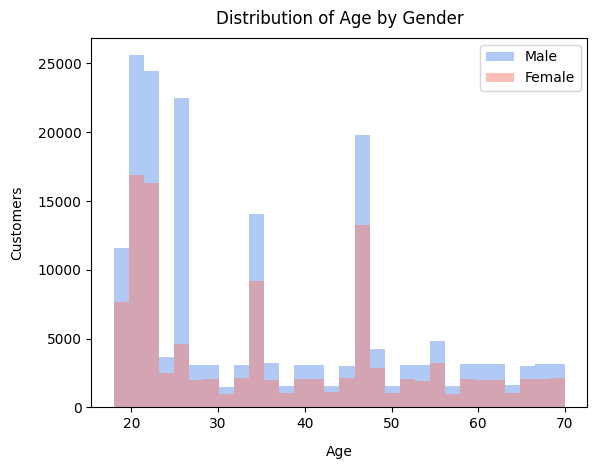

In [41]:
male_age = df_customers[df_customers['Gender'] == 'Male']['Age']
female_age = df_customers[df_customers['Gender'] == 'Female']['Age']

# Vẽ biểu đồ tần suất (histogram chart)
plt.hist(male_age, bins = 30, alpha = 0.5, color = 'cornflowerblue', label = 'Male')
plt.hist(female_age, bins = 30, alpha = 0.5, color = 'salmon', label = 'Female')

plt.title('Distribution of Age by Gender', pad = 10)
plt.xlabel('Age', labelpad = 10)
plt.ylabel('Customers', labelpad = 10)
plt.legend()
plt.show()

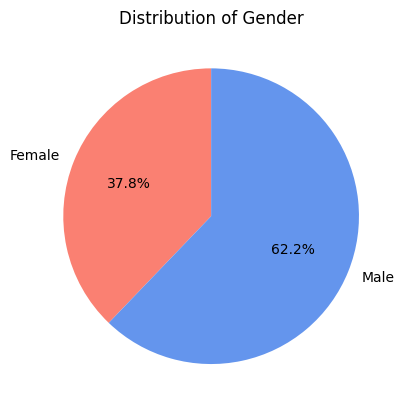

In [42]:
df_gen = df_customers.groupby('Gender').size().reset_index(name = 'Count')

# Vẽ biểu đồ tròn (pie chart)
plt.pie(df_gen['Count'], autopct = '%1.1f%%', colors = ['salmon', 'cornflowerblue'], startangle = 90, labels = df_gen['Gender'])

plt.title('Distribution of Gender')
plt.show()

### **Age Group Distribution**

---
1. Để phân khúc khách hàng rõ ràng hơn, có thể tách độ tuổi thành 6 nhóm để phân tích:
    - **Under 18:** Tuổi thiếu niên, còn đi học, bị ảnh hưởng bởi gia đình và bạn bè.
    - **Young Adults (18-24):** Sinh viên, tìm kiếm sự tự chủ tài chính.
    - **Early Career (25-34):** Phát triển sự nghiệp, lập gia đình.
    - **Mid Career (35-44):** Sự nghiệp ổn định, độc lập tài chính.
    - **Pre-Retirement (45-59):** Chuẩn bị nghị hưu, ổn định và an toàn tài chính.
    - **Senior (60+):** Giai đoạn nghỉ hưu, tập trung vào sức khoẻ.
2. Tuy nhiên, trong tập dữ liệu này, giá trị nhỏ nhất của cột Age là 18, nên để đơn giản cho việc phân tích thì sẽ bỏ đi nhóm **Under 18**.
---

In [43]:
# Thêm cột Age Group để nhóm độ tuổi
bins = [17, 24, 34, 44, 59, float('inf')]
labels = ['Young Adults (18-24)', 'Early Career (25-34)', 'Mid Career (35-44)', 'Pre-Retirement (45-59)', 'Senior (60+)']

df_retail['Age_Group'] = pd.cut(df_retail['Age'], bins = bins, labels = labels, right = False)

df_retail['Age_Group'] = pd.Categorical(df_retail['Age_Group'], categories = labels, ordered = True)

In [44]:
df_retail.head()

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product,Age_Group
0,37249,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5,Cycling shorts,Young Adults (18-24)
1,69749,United Kingdom,19,Female,Low,Premium,2023-12-31,2023,December,08:42:04,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4,Lenovo Tab,Young Adults (18-24)
2,30192,Australia,48,Male,Low,Regular,2023-04-26,2023,April,04:06:29,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2,Sports equipment,Pre-Retirement (45-59)
3,62101,Canada,56,Male,High,Premium,2023-05-08,2023,May,14:55:17,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4,Utility knife,Pre-Retirement (45-59)
4,27901,United Kingdom,22,Male,Low,Premium,2024-01-10,2024,January,16:54:07,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1,Chocolate cookies,Young Adults (18-24)


In [45]:
age_group_counts = df_retail['Age_Group'].value_counts(sort = False)
age_group_counts

,count
Age_Group,
Young Adults (18-24),102445
Early Career (25-34),51083
Mid Career (35-44),43981
Pre-Retirement (45-59),71241
Senior (60+),31112


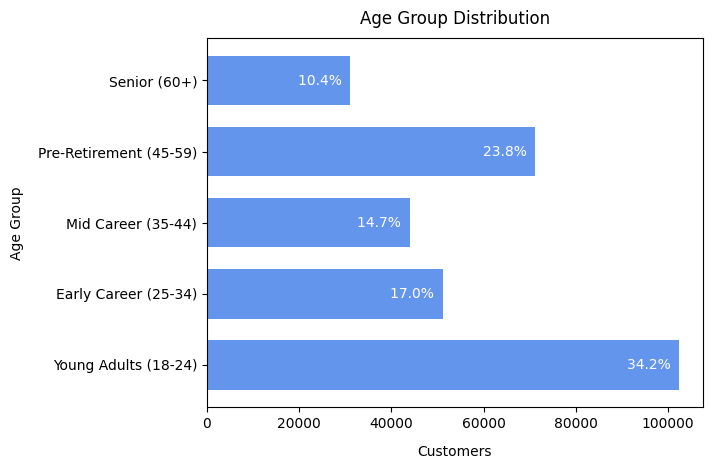

In [46]:
# Vẽ biểu đồ cột ngang (horizontal bar chart)
age_group_counts.plot(kind = 'barh', legend = False, color = 'cornflowerblue', width = 0.7)

# Thêm chú thích số liệu dạng % cho từng cột
for index, value in enumerate(age_group_counts):
    if value > 0:
        per = value / len(df_retail) * 100
        plt.text(value, index, f'{per:.1f}%  ', ha = 'right', va = 'center', color = 'white')

plt.title('Age Group Distribution', pad = 10)
plt.xlabel('Customers', labelpad = 10)
plt.ylabel('Age Group', labelpad = 10)
plt.show()

In [47]:
df_retail.groupby(['Age_Group', 'Income']).size().reset_index()

<ipython-input-47-445d68393e69>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_retail.groupby(['Age_Group', 'Income']).size().reset_index()


,Age_Group,Income,0
0,Young Adults (18-24),Low,24075
1,Young Adults (18-24),Medium,49332
2,Young Adults (18-24),High,29038
3,Early Career (25-34),Low,14534
4,Early Career (25-34),Medium,19238
5,Early Career (25-34),High,17311
6,Mid Career (35-44),Low,17124
7,Mid Career (35-44),Medium,18423
8,Mid Career (35-44),High,8434
9,Pre-Retirement (45-59),Low,28053


### **Country and Income Distribution**

In [48]:
df_country_income = df_retail[['Country', 'Income']].copy()
country_income = pd.crosstab(df_country_income['Country'], df_country_income['Income'])
country_income

Income,Low,Medium,High
Country,,,
Australia,17123,18889,9063
Canada,17121,18722,9200
Germany,17421,25428,9626
United Kingdom,17209,34730,10750
United States,26777,31665,36138


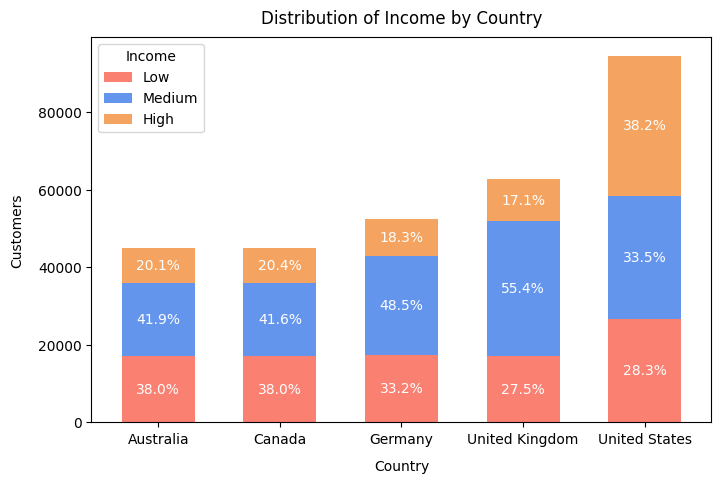

In [49]:
_, ax = plt.subplots(figsize = (8, 5))

# Vẽ biểu đồ cột chồng (stacked bar chart)
country_income.plot(kind = 'bar', stacked = True, color = ['salmon', 'cornflowerblue', 'sandybrown'], width = 0.6, ax = ax)

for i, country in enumerate(country_income.index):
    start = 0
    total = country_income.loc[country].sum()
    for j, income in enumerate(country_income.columns):
        value = country_income.loc[country, income]
        if value > 0:
            per = value / total * 100
            ax.text(i, start + value / 2, f'{per:.1f}%', ha = 'center', va = 'center', color = 'white')
            start += value

ax.set_title('Distribution of Income by Country', pad = 10)
ax.set_xlabel('Country', labelpad = 10)
ax.set_ylabel('Customers', labelpad = 10)

plt.xticks(rotation = 0)
plt.show()

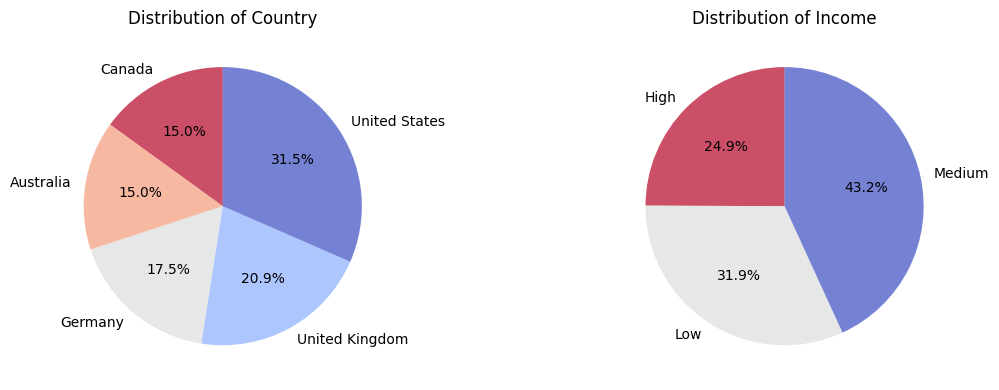

In [50]:
_, ax = plt.subplots(1, 2, figsize = (12, 4))

country_count = df_country_income.groupby('Country', observed = True).size().reset_index(name = 'Count')
country_count = country_count.sort_values('Count', ascending = True)

cmap = plt.get_cmap('coolwarm_r')
colors = cmap(np.linspace(0, 1, len(country_count)), alpha = 0.7)

# Vẽ biểu đồ tròn (pie chart)
ax[0].pie(country_count['Count'], autopct = '%1.1f%%', colors = colors, startangle = 90, labels = country_count['Country'])

ax[0].set_title('Distribution of Country')

income_count = df_country_income.groupby('Income', observed = True).size().reset_index(name = 'Count')
income_count = income_count.sort_values('Count', ascending = True)

colors = cmap(np.linspace(0, 1, len(income_count)), alpha = 0.7)

# Vẽ biểu đồ tròn (pie chart)
ax[1].pie(income_count['Count'], autopct = '%1.1f%%', colors = colors, startangle = 90, labels = income_count['Income'])

ax[1].set_title('Distribution of Income')

plt.tight_layout()
plt.show()

### **Customer Segment Distribution**

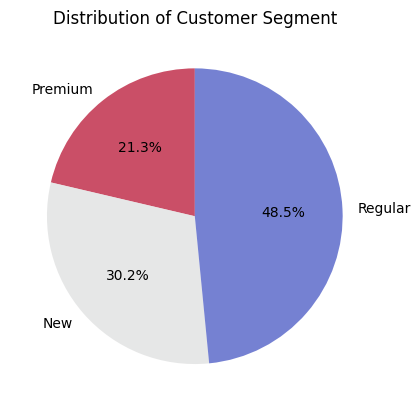

In [51]:
customer_segment = df_retail.groupby('Customer_Segment', observed = True).size().reset_index(name = 'Count')
customer_segment = customer_segment.sort_values('Count', ascending = True)

cmap = plt.get_cmap('coolwarm_r')
colors = cmap(np.linspace(0, 1, len(customer_segment)), alpha = 0.7)

# Vẽ biểu đồ tròn (pie chart)
plt.pie(customer_segment['Count'], autopct = '%1.1f%%', colors = colors, startangle = 90, labels = customer_segment['Customer_Segment'])

plt.title('Distribution of Customer Segment')
plt.show()

In [52]:
segment_income = pd.crosstab(df_retail['Income'], df_retail['Customer_Segment'])
segment_income.sort_index(axis = 0, ascending = False, inplace = True)
segment_income

Customer_Segment,New,Regular,Premium
Income,,,
High,16533,45515,12729
Medium,41243,62365,25826
Low,32839,37408,25404


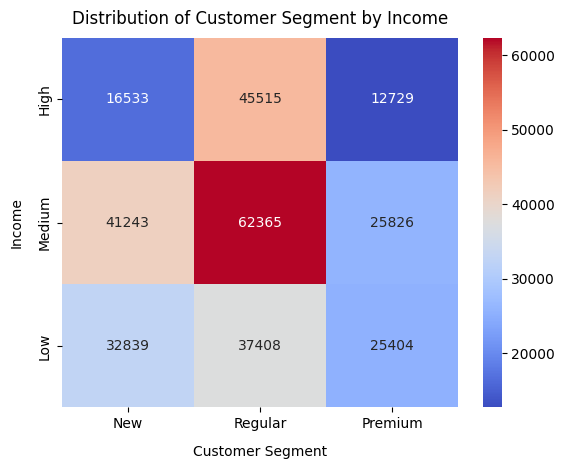

In [53]:
# Vẽ biểu đồ nhiệt (heatmap)
sns.heatmap(segment_income, annot = True, fmt = 'd', cmap = 'coolwarm')

plt.title('Distribution of Customer Segment by Income', pad = 10)
plt.xlabel('Customer Segment', labelpad = 10)
plt.ylabel('Income', labelpad = 10)
plt.show()

In [54]:
segment_agegroup = pd.crosstab(df_retail['Customer_Segment'], df_retail['Age_Group'])
segment_agegroup

Age_Group,Young Adults (18-24),Early Career (25-34),Mid Career (35-44),Pre-Retirement (45-59),Senior (60+)
Customer_Segment,,,,,
New,33123,10380,14268,22977,9867
Regular,61131,30703,15859,25788,11807
Premium,8191,10000,13854,22476,9438


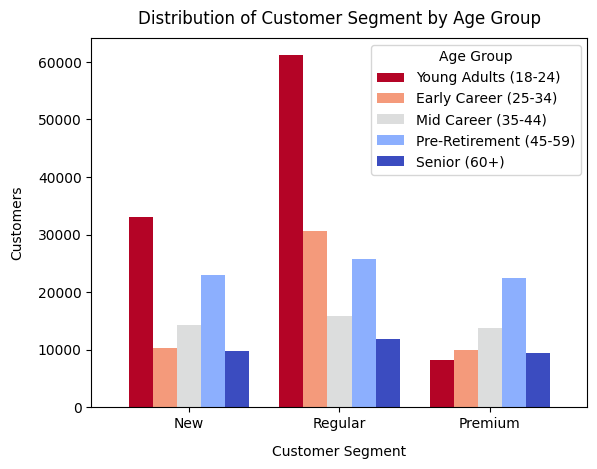

In [55]:
# Vẽ biểu đồ cột nhóm (grouped bar chart)
segment_agegroup.plot(kind = 'bar', cmap = 'coolwarm_r', width = 0.8)

plt.title('Distribution of Customer Segment by Age Group', pad = 10)
plt.xlabel('Customer Segment', labelpad = 10)
plt.ylabel('Customers', labelpad = 10)
plt.xticks(rotation = 0)
plt.legend(title = 'Age Group')
plt.show()

## **3.2. Time Series**

In [56]:
df_retail.rename(columns = {'Month': 'Month_Name'}, inplace = True)

df_retail['Month'] = pd.to_datetime(df_retail['Date']).dt.month
df_retail['Day_Name'] = pd.to_datetime(df_retail['Date']).dt.day_name()
df_retail['Year_Month'] = df_retail['Date'].dt.strftime('%Y-%m')
df_retail['Hour'] = df_retail['Time'].str[:2].astype('int')

In [57]:
df_retail.head()

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month_Name,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product,Age_Group,Month,Day_Name,Year_Month,Hour
0,37249,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5,Cycling shorts,Young Adults (18-24),9,Monday,2023-09,22
1,69749,United Kingdom,19,Female,Low,Premium,2023-12-31,2023,December,08:42:04,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4,Lenovo Tab,Young Adults (18-24),12,Sunday,2023-12,8
2,30192,Australia,48,Male,Low,Regular,2023-04-26,2023,April,04:06:29,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2,Sports equipment,Pre-Retirement (45-59),4,Wednesday,2023-04,4
3,62101,Canada,56,Male,High,Premium,2023-05-08,2023,May,14:55:17,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4,Utility knife,Pre-Retirement (45-59),5,Monday,2023-05,14
4,27901,United Kingdom,22,Male,Low,Premium,2024-01-10,2024,January,16:54:07,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1,Chocolate cookies,Young Adults (18-24),1,Wednesday,2024-01,16


### **Trend by Month**

In [58]:
df_year_month = (
                    df_retail
                    .groupby('Year_Month')
                    .agg(
                        Total_Quantity = ('Total_Purchases', 'sum')
                        , Total_Order = ('Year_Month', 'count')
                    )
                    .reset_index()
)

df_year_month

,Year_Month,Total_Quantity,Total_Order
0,2023-03,136782,25438
1,2023-04,132327,24605
2,2023-05,134395,25090
3,2023-06,131762,24644
4,2023-07,136458,25372
5,2023-08,136818,25385
6,2023-09,132249,24719
7,2023-10,135588,25424
8,2023-11,131164,24486
9,2023-12,134889,25205


---
1. Vì các giá trị chỉ nằm trong khoảng 24000 - 25500 nên nếu vẽ biểu đồ đường (với y_lim = 0) sẽ khó nhìn thấy được thay đổi giữa các tháng. Thay vào đó, sử dụng biểu đồ đường bỏ đi trục y để thể hiện xu hướng theo thời gian.
2. Vẽ biểu đồ cột (bar chart) sẽ tốt hơn về mặt thẩm mỹ và đánh giá dữ liệu.
---

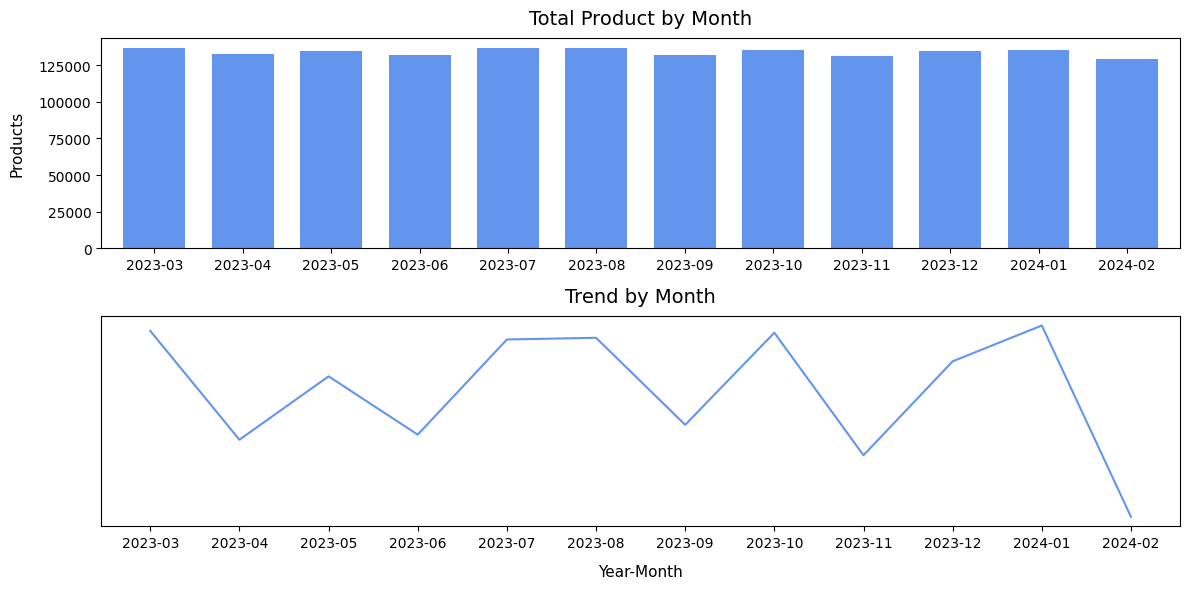

In [59]:
_, ax = plt.subplots(2, 1, figsize = (12, 6))

# Vẽ biểu đồ cột (bar chart)
df_year_month.plot(x = 'Year_Month', y = 'Total_Quantity', kind = 'bar', color = 'cornflowerblue', ax = ax[0], width = 0.7, legend = False)

ax[0].set_title('Total Product by Month', pad = 10, fontsize = 14)
ax[0].set_xlabel('', labelpad = 10)
ax[0].set_ylabel('Products', labelpad = 10, fontsize = 11)
ax[0].set_xticks(ticks = range(len(df_year_month)), labels = df_year_month['Year_Month'], rotation = 0)

# Vẽ biểu đồ đường (line chart)
df_year_month.plot(x = 'Year_Month', y = 'Total_Order', kind = 'line', color = 'cornflowerblue', ax = ax[1], legend = False)

ax[1].set_title('Trend by Month', pad = 10, fontsize = 14)
ax[1].set_xlabel('Year-Month', labelpad = 10, fontsize = 11)
ax[1].set_xticks(ticks = range(len(df_year_month)), labels = df_year_month['Year_Month'], rotation = 0)
ax[1].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

### **Trend by Week Days**

In [60]:
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_retail['Day_Name'] = pd.Categorical(df_retail['Day_Name'], categories = week_day_order, ordered = True)

df_week_day = (
                    df_retail
                    .groupby('Day_Name', observed = True)
                    .agg(
                        Total_Quantity = ('Total_Purchases', 'sum')
                        , Total_Order = ('Day_Name', 'count')
                        , Total_Revenue = ('Total_Amount', 'sum')
                    )
                    .reset_index()
)

df_week_day

,Day_Name,Total_Quantity,Total_Order,Total_Revenue
0,Monday,228895,42603,5.804674e+07
1,Tuesday,228876,42665,5.812794e+07
2,Wednesday,231399,43279,5.910510e+07
3,Thursday,231480,43328,5.947963e+07
4,Friday,229752,42721,5.895090e+07
5,Saturday,228226,42569,5.821802e+07
6,Sunday,228291,42697,5.810971e+07


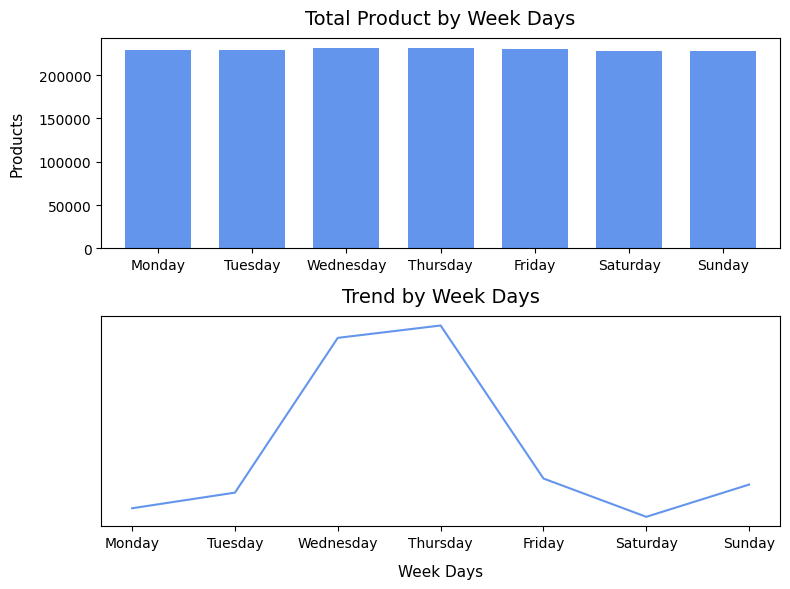

In [61]:
_, ax = plt.subplots(2, 1, figsize = (8, 6))

# Vẽ biểu đồ cột (bar chart)
df_week_day.plot(x = 'Day_Name', y = 'Total_Quantity', kind = 'bar', color = 'cornflowerblue', ax = ax[0], width = 0.7, legend = False)

ax[0].set_title('Total Product by Week Days', pad = 10, fontsize = 14)
ax[0].set_xlabel('', labelpad = 10)
ax[0].set_ylabel('Products', labelpad = 10, fontsize = 11)
ax[0].set_xticks(ticks = range(len(df_week_day)), labels = df_week_day['Day_Name'], rotation = 0)

# Vẽ biểu đồ đường (line chart)
df_week_day.plot(x = 'Day_Name', y = 'Total_Order', kind = 'line', color = 'cornflowerblue', ax = ax[1], legend = False)

ax[1].set_title('Trend by Week Days', pad = 10, fontsize = 14)
ax[1].set_xlabel('Week Days', labelpad = 10, fontsize = 11)
ax[1].set_xticks(ticks = range(len(df_week_day)), labels = df_week_day['Day_Name'], rotation = 0)
ax[1].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

### **Trend by Hours**

In [62]:
df_hours = (
                    df_retail
                    .groupby('Hour')
                    .agg(
                        Total_Quantity = ('Total_Purchases', 'sum')
                        , Total_Order = ('Hour', 'count')
                    )
                    .reset_index()
)

df_hours['Total_Quantity'].max()

68103

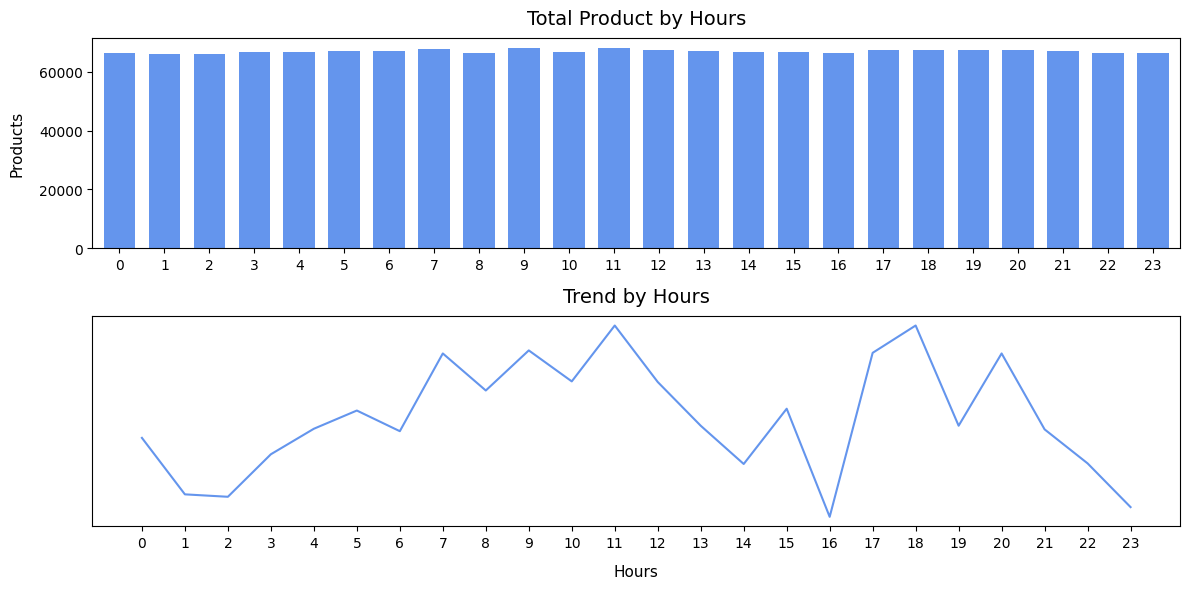

In [63]:
_, ax = plt.subplots(2, 1, figsize = (12, 6))

# Vẽ biểu đồ cột (bar chart)
df_hours.plot(x = 'Hour', y = 'Total_Quantity', kind = 'bar', color = 'cornflowerblue', ax = ax[0], width = 0.7, legend = False)

ax[0].set_title('Total Product by Hours', pad = 10, fontsize = 14)
ax[0].set_xlabel('', labelpad = 10)
ax[0].set_ylabel('Products', labelpad = 10, fontsize = 11)
ax[0].set_xticks(ticks = range(len(df_hours)), labels = df_hours['Hour'], rotation = 0)

# Vẽ biểu đồ đường (line chart)
df_hours.plot(x = 'Hour', y = 'Total_Order', kind = 'line', color = 'cornflowerblue', ax = ax[1], legend = False)

ax[1].set_title('Trend by Hours', pad = 10, fontsize = 14)
ax[1].set_xlabel('Hours', labelpad = 10, fontsize = 11)
ax[1].set_xticks(ticks = range(len(df_hours)), labels = df_hours['Hour'], rotation = 0)
ax[1].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

## **3.3. Factors that influence customers**

### **Product**

**Product Brand**

    Brand nào đang được ưa chuộng?

In [64]:
df_brand_total = (
            df_retail
            .groupby('Product_Brand')
            .agg(Total_Order = ('Product_Brand', 'count'), Total_Revenue = ('Total_Amount', 'sum'))
            .sort_values('Total_Order', ascending = False)
            .reset_index()
)

df_brand_total['Total_Revenue'] = df_brand_total['Total_Revenue'] / 10**6

df_brand_total.head()

,Product_Brand,Total_Order,Total_Revenue
0,Pepsi,30099,41.149743
1,Coca-Cola,18284,24.894213
2,Zara,18261,24.854102
3,HarperCollins,18256,24.824885
4,Samsung,18252,25.227923


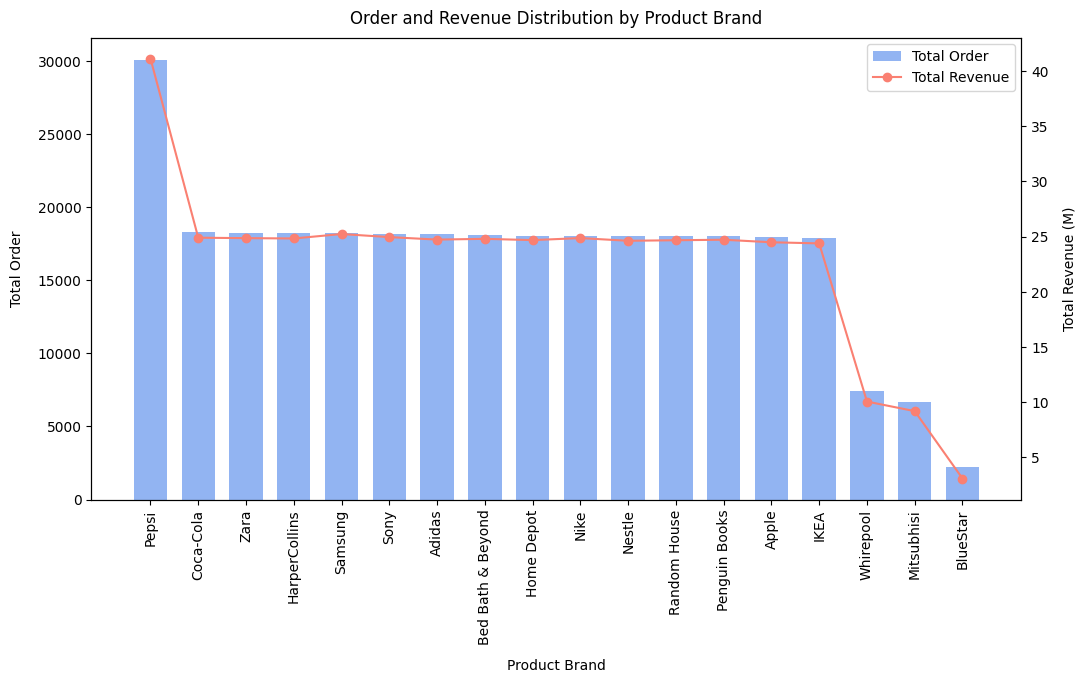

In [65]:
_, ax1 = plt.subplots(figsize = (12, 6))

# Vẽ biểu đồ cột cho số lượng đơn hàng
ax1.bar(df_brand_total['Product_Brand'], df_brand_total['Total_Order'], color = 'cornflowerblue', width = 0.7, label = 'Total Order', alpha = 0.7)
ax1.set_xlabel('Product Brand', labelpad = 10)
ax1.set_ylabel('Total Order', labelpad = 10)
ax1.set_xticks(ticks = range(len(df_brand_total)), labels = df_brand_total['Product_Brand'], rotation = 90)

# Tạo một trục y thứ hai cho doanh thu
ax2 = ax1.twinx()
ax2.plot(df_brand_total['Product_Brand'], df_brand_total['Total_Revenue'], color = 'salmon', marker = 'o', label = 'Total Revenue')
ax2.set_ylabel('Total Revenue (M)', labelpad = 10)

plt.title('Order and Revenue Distribution by Product Brand', pad = 10)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2)

plt.show()

---
**Product Category**

    Category phân bổ như thế nào theo giới tính?

In [66]:
df_category_gender = pd.crosstab(df_retail['Product_Category'], df_retail['Gender'])
df_category_gender

Gender,Female,Male
Product_Category,,
Books,21095,33186
Clothing,21011,33419
Electronics,24560,46177
Grocery,25772,40635
Home Decor,20989,33018


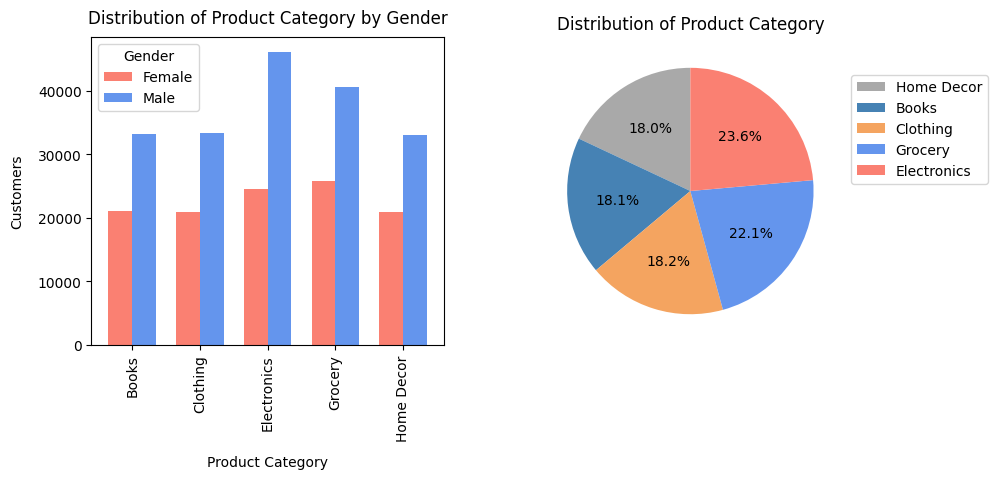

In [67]:
_, ax = plt.subplots(1, 2, figsize = (10, 4))

# Vẽ biểu đồ cột nhóm (grouped bar chart)
df_category_gender.plot(kind = 'bar', color = ['salmon', 'cornflowerblue'], width = 0.7, ax = ax[0])

ax[0].set_title('Distribution of Product Category by Gender', pad = 10)
ax[0].set_xlabel('Product Category', labelpad = 10)
ax[0].set_ylabel('Customers', labelpad = 10)

df_category = df_retail.groupby('Product_Category').size().reset_index(name = 'Count')
df_category = df_category.sort_values('Count', ascending = True)

# Vẽ biểu đồ tròn (pie chart)
ax[1].pie(df_category['Count'], autopct = '%1.1f%%', colors = ['darkgrey', 'steelblue', 'sandybrown', 'cornflowerblue', 'salmon'], startangle = 90)

ax[1].set_title('Distribution of Product Category')
ax[1].legend(df_category['Product_Category'], bbox_to_anchor = (1, 0.9))

plt.xticks(rotation = 0)
plt.show()

---
**Product Type**

    Top 10 loại sản phẩm được ưa chuộng theo từng giới tính?

In [68]:
df_type_gender = pd.crosstab(df_retail['Product_Type'], df_retail['Gender'])
df_type_gender.head()

Gender,Female,Male
Product_Type,,
Bathroom,2306,3658
Bedding,2329,3633
BlueStar AC,894,1349
Children's,2417,3683
Chocolate,2320,3696


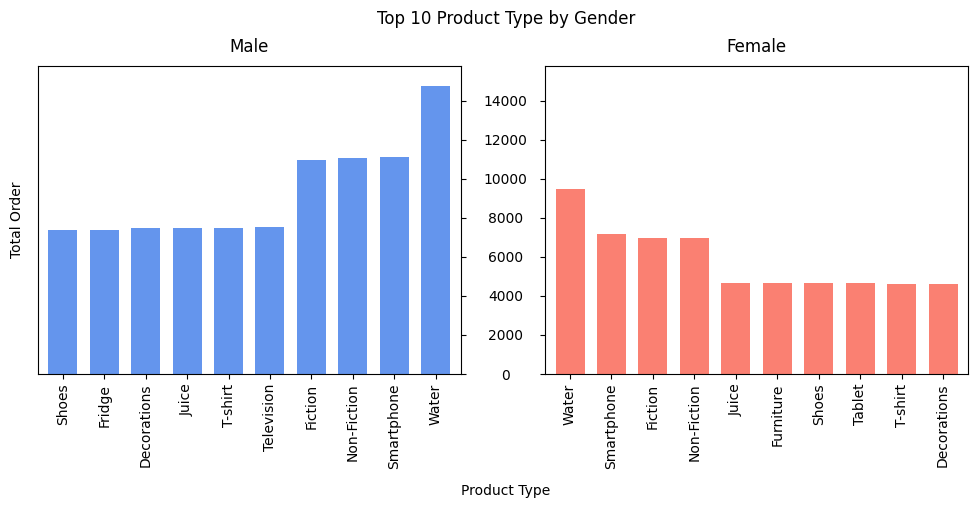

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

# Lấy top 10 các loại sản phẩm theo từng giới tính
df_type_male = df_type_gender.sort_values('Male', ascending = True)['Male'].tail(10)
df_type_female = df_type_gender.sort_values('Female', ascending = False)['Female'].head(10)

# Vẽ biểu đồ cột cho Male (bar chart)
df_type_male.plot(kind = 'bar', color = 'cornflowerblue', ax = ax[0], width = 0.7, legend = False)

ax[0].set_title('Male', pad = 10)
ax[0].set_xlabel('')
ax[0].set_ylabel('Total Order', labelpad = 10)
ax[0].set_ylim(top = df_type_male.iloc[-1] + 1000)
ax[0].yaxis.tick_right()
ax[0].tick_params(axis = 'y', which = 'both', labelright = False)

# Vẽ biểu đồ cột cho Female (bar chart)
df_type_female.plot(kind = 'bar', color = 'salmon', ax = ax[1], width = 0.7, legend = False)

ax[1].set_title('Female', pad = 10)
ax[1].set_xlabel('')
ax[1].set_ylim(top = df_type_male.iloc[-1] + 1000)
yticks = [int(i) for i in ax[1].get_yticks()]
ax[1].set_yticks(ax[1].get_yticks()[:-1])
ax[1].set_yticklabels(yticks[:-1], ha = 'center')
ax[1].tick_params(axis = 'y', pad = 25)

fig.suptitle('Top 10 Product Type by Gender', x = 0.515,  y = 1.02)
fig.supxlabel('Product Type', x = 0.515, y = -0.2, fontsize = 10)
plt.show()

---
**Product**

    Top 10 sản phẩm có mức tiêu thụ cao nhất?

In [70]:
df_product_total = (
                    df_retail
                    .groupby('Product')
                    .agg(
                        Total_Quantity = ('Total_Purchases', 'sum')
                        , Total_Revenue = ('Total_Amount', 'sum')
                    )
                    .sort_values('Total_Quantity', ascending = False)
                    .reset_index()
)

df_product_total['Total_Revenue'] = df_product_total['Total_Revenue'] / 10**6
df_product_total = df_product_total.head(10)

df_product_total

,Product,Total_Quantity,Total_Revenue
0,Distilled water,13368,3.381423
1,Bottled water,13283,3.410629
2,Spring water,13247,3.387387
3,Artesian water,13133,3.303077
4,Mystery,13048,3.288562
5,Flavored water,13017,3.335083
6,Mineral water,12979,3.365155
7,Coconut water,12927,3.229120
8,Alkaline water,12914,3.348703
9,Adventure,12848,3.237599


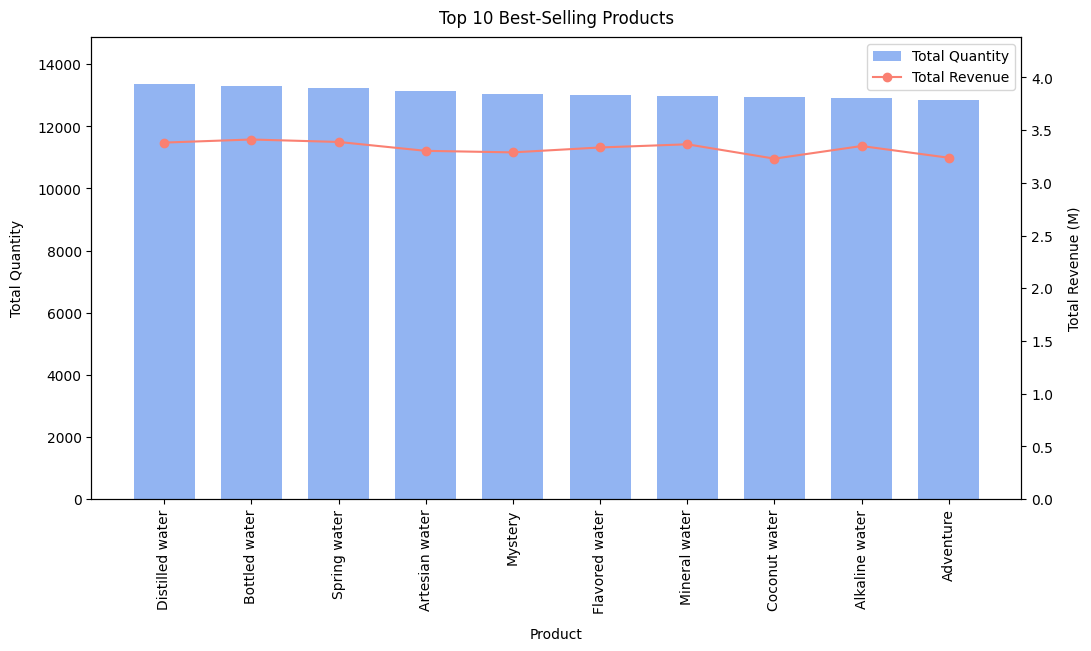

In [71]:
_, ax1 = plt.subplots(figsize = (12, 6))

# Vẽ biểu đồ cột cho số lượng sản phẩm bán ra
ax1.bar(df_product_total['Product'], df_product_total['Total_Quantity'], color = 'cornflowerblue', width = 0.7, label = 'Total Quantity', alpha = 0.7)
ax1.set_xlabel('Product', labelpad = 10)
ax1.set_ylabel('Total Quantity', labelpad = 10)
ax1.set_xticks(ticks = range(len(df_product_total)), labels = df_product_total['Product'], rotation = 90)
ax1.set_ylim(top = df_product_total['Total_Quantity'].iloc[0] + 1500)

# Tạo một trục y thứ hai cho doanh thu
ax2 = ax1.twinx()
ax2.plot(df_product_total['Product'], df_product_total['Total_Revenue'], color = 'salmon', marker = 'o', label = 'Total Revenue')
ax2.set_ylabel('Total Revenue (M)', labelpad = 10)
ax2.set_ylim(top = df_product_total['Total_Revenue'].iloc[0] + 1, bottom = 0)

plt.title('Top 10 Best-Selling Products', pad = 10)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2)

plt.show()

### **Shipping Method**

In [72]:
df_shipping_method = df_retail.groupby('Shipping_Method').size().reset_index(name = 'Total_Product')
df_shipping_method

,Shipping_Method,Total_Product
0,Express,101703
1,Same-Day,103568
2,Standard,94591


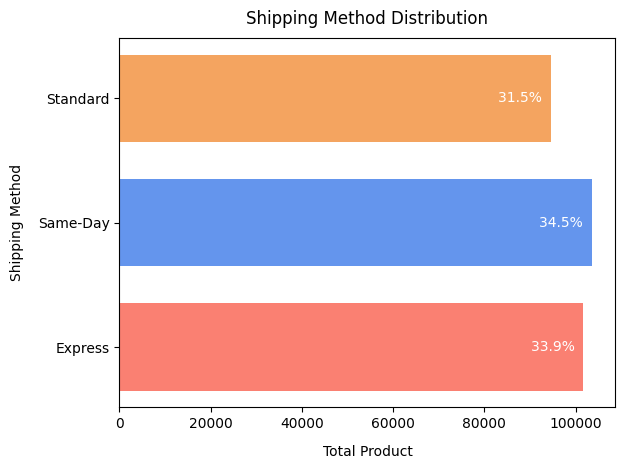

In [73]:
# Vẽ biểu đồ cột ngang (horizontal bar chart)
plt.barh(df_shipping_method['Shipping_Method'], df_shipping_method['Total_Product']
        , color = ['salmon', 'cornflowerblue', 'sandybrown'], height = 0.7)

# Thêm chú thích số liệu dạng % cho từng cột
for index, value in enumerate(df_shipping_method['Total_Product']):
    if value > 0:
        per = value / len(df_retail) * 100
        plt.text(value, index, f'{per:.1f}%  ', ha = 'right', va = 'center', color = 'white')

plt.title('Shipping Method Distribution', pad = 10)
plt.xlabel('Total Product', labelpad = 10)
plt.ylabel('Shipping Method', labelpad = 10)
plt.yticks(ticks = range(len(df_shipping_method)), labels = df_shipping_method['Shipping_Method'])
plt.show()

In [74]:
df_shipping_country = pd.crosstab(df_retail['Country'], df_retail['Shipping_Method'])
df_shipping_country

Shipping_Method,Express,Same-Day,Standard
Country,,,
Australia,15271,15615,14189
Canada,15467,15873,13703
Germany,17889,18096,16490
United Kingdom,21131,21729,19829
United States,31945,32255,30380


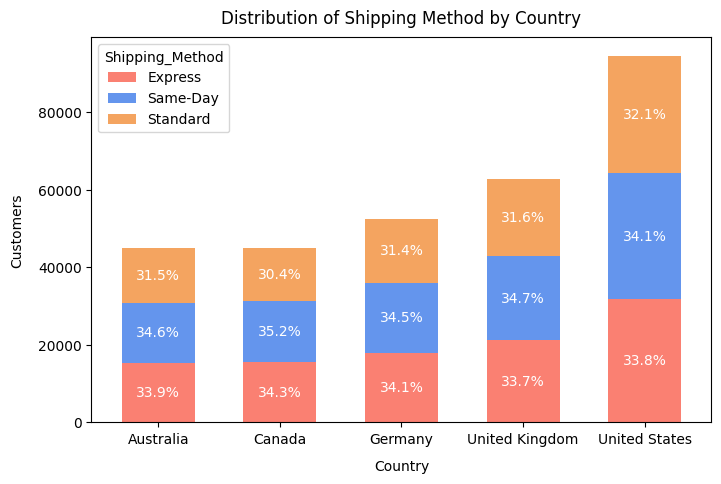

In [75]:
_, ax = plt.subplots(figsize = (8, 5))

# Vẽ biểu đồ cột chồng (stacked bar chart)
df_shipping_country.plot(kind = 'bar', stacked = True, color = ['salmon', 'cornflowerblue', 'sandybrown'], width = 0.6, ax = ax)

for i, country in enumerate(df_shipping_country.index):
    start = 0
    total = df_shipping_country.loc[country].sum()
    for j, method in enumerate(df_shipping_country.columns):
        value = df_shipping_country.loc[country, method]
        if value > 0:
            per = value / total * 100
            ax.text(i, start + value / 2, f'{per:.1f}%', ha = 'center', va = 'center', color = 'white')
            start += value

ax.set_title('Distribution of Shipping Method by Country', pad = 10)
ax.set_xlabel('Country', labelpad = 10)
ax.set_ylabel('Customers', labelpad = 10)

plt.xticks(rotation = 0)
plt.show()

In [76]:
df_shipping_product = pd.crosstab(df_retail['Product_Category'], df_retail['Shipping_Method'])

df_shipping_product['Total'] = df_shipping_product.iloc[:, 0:].sum(axis = 1)

for i in df_shipping_product.columns[:3]:
    df_shipping_product[i + '_Pct'] = df_shipping_product[i] / df_shipping_product['Total'] * 100

df_shipping_product

Shipping_Method,Express,Same-Day,Standard,Total,Express_Pct,Same-Day_Pct,Standard_Pct
Product_Category,,,,,,,
Books,18338,18193,17750,54281,33.783460,33.516332,32.700208
Clothing,18583,18175,17672,54430,34.141099,33.391512,32.467389
Electronics,24204,26424,20109,70737,34.216888,37.355274,28.427838
Grocery,22279,22494,21634,66407,33.549174,33.872935,32.577891
Home Decor,18299,18282,17426,54007,33.882645,33.851167,32.266188


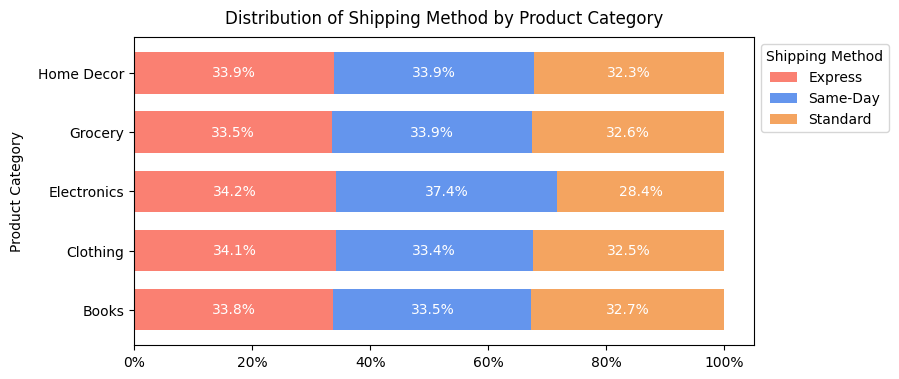

In [77]:
_, ax = plt.subplots(figsize = (8, 4))

# Vẽ biểu đồ cột chồng 100% (stacked 100% bar chart)
df_shipping_product[['Express_Pct', 'Same-Day_Pct', 'Standard_Pct']].plot(kind = 'barh'
                                                                          , stacked = True
                                                                          , color = ['salmon', 'cornflowerblue', 'sandybrown']
                                                                          , width = 0.7
                                                                          , ax = ax)

for i, category in enumerate(df_shipping_product.index):
    start = 0
    for j, method in enumerate(df_shipping_product.columns[4:7]):
        value = df_shipping_product.loc[category, method]
        ax.text(start + value / 2, i, f'{value:.1f}%', ha = 'center', va = 'center', color = 'white')
        start += value

ax.set_title('Distribution of Shipping Method by Product Category', pad = 10)
ax.set_ylabel('Product Category', labelpad = 10)
xticks = [f'{x:.0f}%' for x in ax.get_xticks()[:-1]]
ax.set_xticks(ax.get_xticks()[:-1])
ax.set_xticklabels(xticks)
ax.legend(title = 'Shipping Method', labels = ['Express', 'Same-Day', 'Standard'], bbox_to_anchor = (1, 1))

plt.xticks(rotation = 0)
plt.show()

In [78]:
df_shipping_day = df_retail.groupby(['Day_Name', 'Shipping_Method'], observed = True).size().reset_index(name = 'Total_Order')
df_shipping_day.head(10)

,Day_Name,Shipping_Method,Total_Order
0,Monday,Express,14445
1,Monday,Same-Day,14605
2,Monday,Standard,13553
3,Tuesday,Express,14464
4,Tuesday,Same-Day,14709
5,Tuesday,Standard,13492
6,Wednesday,Express,14509
7,Wednesday,Same-Day,15074
8,Wednesday,Standard,13696
9,Thursday,Express,14665


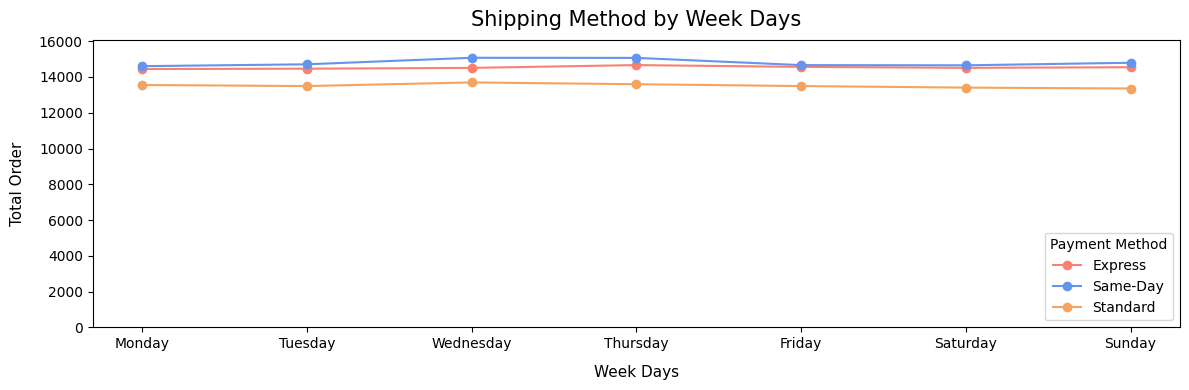

In [79]:
_, ax = plt.subplots(figsize = (12, 4))

# Vẽ biểu đồ đường (line chart)
df_express = df_shipping_day[df_shipping_day['Shipping_Method'] == 'Express']
df_express.plot(x = 'Day_Name', y = 'Total_Order', kind = 'line', color = 'salmon', marker = 'o', ax = ax, label = 'Express')

df_same_day = df_shipping_day[df_shipping_day['Shipping_Method'] == 'Same-Day']
df_same_day.plot(x = 'Day_Name', y = 'Total_Order', kind = 'line', color = 'cornflowerblue', marker = 'o', ax = ax, label = 'Same-Day')

df_standard = df_shipping_day[df_shipping_day['Shipping_Method'] == 'Standard']
df_standard.plot(x = 'Day_Name', y = 'Total_Order', kind = 'line', color = 'sandybrown', marker = 'o', ax = ax, label = 'Standard')

ax.set_title('Shipping Method by Week Days', pad = 10, fontsize = 15)
ax.set_xlabel('Week Days', labelpad = 10, fontsize = 11)
ax.set_ylabel('Total Order', labelpad = 10, fontsize = 11)
ax.set_ylim(top = df_shipping_day['Total_Order'].max() + 1000, bottom = 0)
ax.set_xticks(ticks = range(df_shipping_day['Day_Name'].nunique())
            , labels = df_shipping_day['Day_Name'].drop_duplicates(), rotation = 0)

plt.legend(title = 'Payment Method', loc = 'lower right')
plt.tight_layout()
plt.show()

### **Payment Method**

In [80]:
df_payment_method = df_retail.groupby('Payment_Method').size().reset_index(name = 'Total_Product')
df_payment_method

,Payment_Method,Total_Product
0,Cash,73366
1,Credit Card,89578
2,Debit Card,76288
3,PayPal,60630


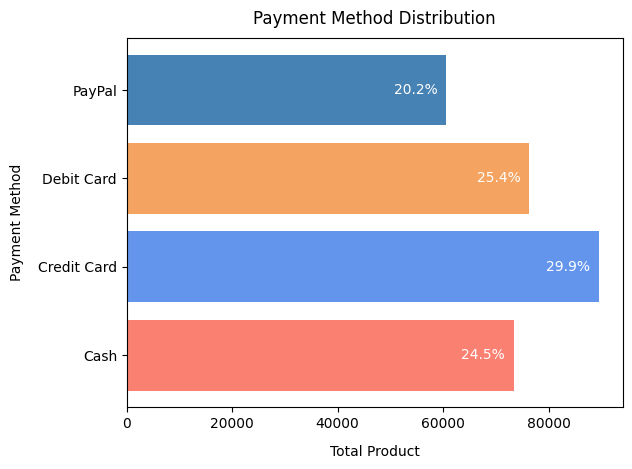

In [81]:
# Vẽ biểu đồ cột ngang (horizontal bar chart)
plt.barh(df_payment_method['Payment_Method'], df_payment_method['Total_Product']
        , color = ['salmon', 'cornflowerblue', 'sandybrown', 'steelblue'])

# Thêm chú thích số liệu dạng % cho từng cột
for index, value in enumerate(df_payment_method['Total_Product']):
    if value > 0:
        per = value / len(df_retail) * 100
        plt.text(value, index, f'{per:.1f}%  ', ha = 'right', va = 'center', color = 'white')

plt.title('Payment Method Distribution', pad = 10)
plt.xlabel('Total Product', labelpad = 10)
plt.ylabel('Payment Method', labelpad = 10)
plt.yticks(ticks = range(len(df_payment_method)), labels = df_payment_method['Payment_Method'])
plt.show()

In [82]:
df_payment_method_time = df_retail.groupby(['Year_Month', 'Payment_Method']).size().reset_index(name = 'Total_Product')
df_payment_method_time.head(10)

,Year_Month,Payment_Method,Total_Product
0,2023-03,Cash,6211
1,2023-03,Credit Card,7600
2,2023-03,Debit Card,6507
3,2023-03,PayPal,5120
4,2023-04,Cash,6023
5,2023-04,Credit Card,7382
6,2023-04,Debit Card,6312
7,2023-04,PayPal,4888
8,2023-05,Cash,6140
9,2023-05,Credit Card,7366


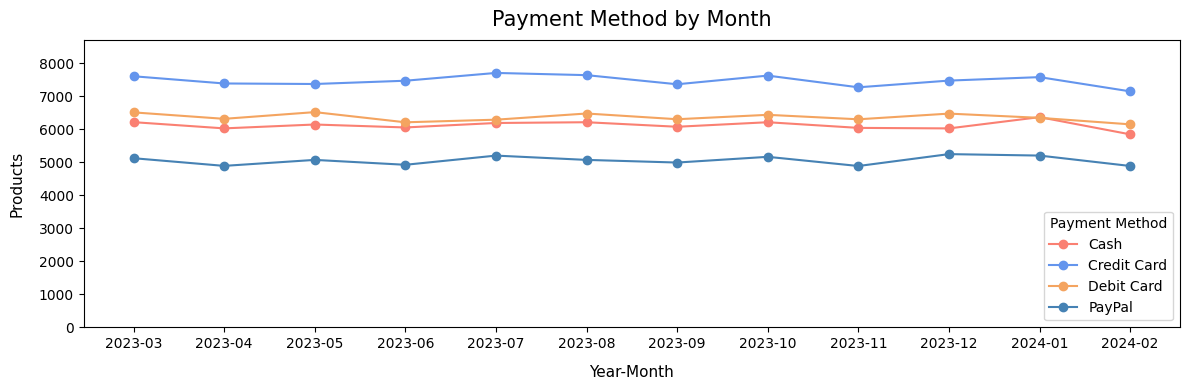

In [83]:
_, ax = plt.subplots(figsize = (12, 4))

# Vẽ biểu đồ đường (line chart)
df_cash = df_payment_method_time[df_payment_method_time['Payment_Method'] == 'Cash']
df_cash.plot(x = 'Year_Month', y = 'Total_Product', kind = 'line', color = 'salmon', marker = 'o', ax = ax, label = 'Cash')

df_credit_card = df_payment_method_time[df_payment_method_time['Payment_Method'] == 'Credit Card']
df_credit_card.plot(x = 'Year_Month', y = 'Total_Product', kind = 'line', color = 'cornflowerblue', marker = 'o', ax = ax, label = 'Credit Card')

df_debit_card = df_payment_method_time[df_payment_method_time['Payment_Method'] == 'Debit Card']
df_debit_card.plot(x = 'Year_Month', y = 'Total_Product', kind = 'line', color = 'sandybrown', marker = 'o', ax = ax, label = 'Debit Card')

df_paypal = df_payment_method_time[df_payment_method_time['Payment_Method'] == 'PayPal']
df_paypal.plot(x = 'Year_Month', y = 'Total_Product', kind = 'line', color = 'steelblue', marker = 'o', ax = ax, label = 'PayPal')

ax.set_title('Payment Method by Month', pad = 10, fontsize = 15)
ax.set_xlabel('Year-Month', labelpad = 10, fontsize = 11)
ax.set_ylabel('Products', labelpad = 10, fontsize = 11)
ax.set_ylim(top = df_payment_method_time['Total_Product'].max() + 1000, bottom = 0)
ax.set_xticks(ticks = range(df_payment_method_time['Year_Month'].nunique())
            , labels = df_payment_method_time['Year_Month'].drop_duplicates(), rotation = 0)

plt.legend(title = 'Payment Method', loc = 'lower right')
plt.tight_layout()
plt.show()

In [84]:
payment_shipping = pd.crosstab(df_retail['Shipping_Method'], df_retail['Payment_Method'])
payment_shipping

Payment_Method,Cash,Credit Card,Debit Card,PayPal
Shipping_Method,,,,
Express,25121,30894,25442,20246
Same-Day,25755,32023,25574,20216
Standard,22490,26661,25272,20168


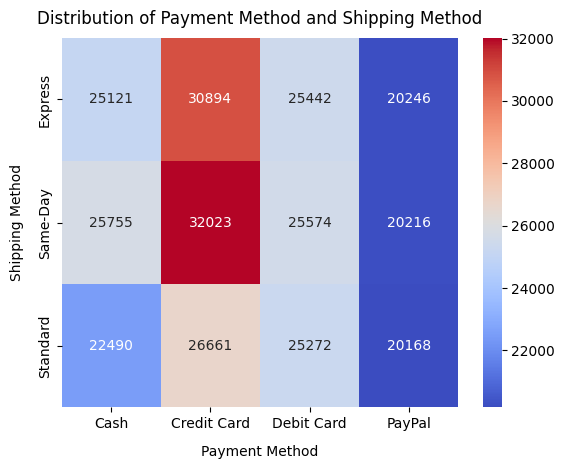

In [85]:
# Vẽ biểu đồ nhiệt (heatmap)
sns.heatmap(payment_shipping, annot = True, fmt = 'd', cmap = 'coolwarm')

plt.title('Distribution of Payment Method and Shipping Method', pad = 10)
plt.xlabel('Payment Method', labelpad = 10)
plt.ylabel('Shipping Method', labelpad = 10)
plt.show()

## **3.4. Customer Satisfaction**

In [86]:
# df_feedback_rating = df_retail[['Ratings', 'Feedback']].copy()
df_feedback_rating = df_retail.groupby(['Feedback', 'Ratings'], observed = True).size().reset_index(name = 'Total_Order')
df_feedback_rating = df_feedback_rating[df_feedback_rating['Total_Order'] > 0].reset_index(drop = True)

# Mã hoá giá trị của Feedback thành số (One-hot encoding)
feedback_mapping = {
    'Bad': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}
df_feedback_rating['Feedback_Encoded'] = df_feedback_rating['Feedback'].map(feedback_mapping)

df_feedback_rating

,Feedback,Ratings,Total_Order,Feedback_Encoded
0,Bad,1,43005,1
1,Average,2,62221,2
2,Good,3,47332,3
3,Good,4,47128,3
4,Excellent,3,184,4
5,Excellent,4,50211,4
6,Excellent,5,49781,4


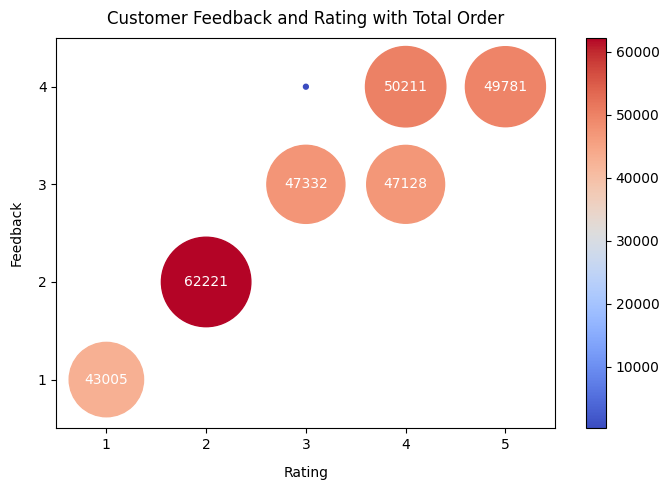

In [87]:
_, ax = plt.subplots(figsize = (7, 5))

# Vẽ biểu đồ bong bóng (Bubble Chart)
scatter = ax.scatter(
                     df_feedback_rating['Ratings'], df_feedback_rating['Feedback_Encoded']
                     , s = df_feedback_rating['Total_Order'] / 15
                     , c = df_feedback_rating['Total_Order'], cmap = 'coolwarm'
        )

ax.set_title('Customer Feedback and Rating with Total Order', pad = 10)
ax.set_xlabel('Rating', labelpad = 10)
ax.set_ylabel('Feedback', labelpad = 10)
x_ticks = range(1, 6)
y_ticks = range(1, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim([0.5, 5.5])
ax.set_ylim([0.5, 4.5])

for i, col in df_feedback_rating.iterrows():
    if col['Total_Order'] > (df_feedback_rating['Total_Order'].max() / 2):
        ax.text(col['Ratings'], col['Feedback_Encoded']
                , f'{col["Total_Order"]}', ha = 'center', va = 'center', color = 'white')

plt.colorbar(scatter)
plt.tight_layout()
plt.show()

### **Product Rating**

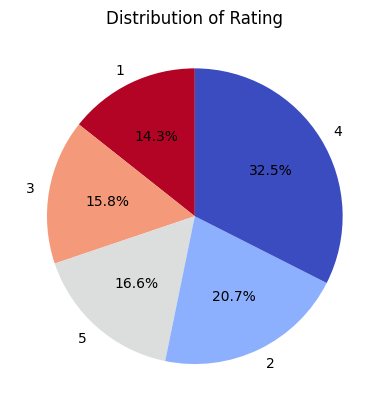

In [88]:
rating_count = df_retail.groupby('Ratings', observed = True).size().reset_index(name = 'Count')
rating_count = rating_count.sort_values('Count', ascending = True)

cmap = plt.get_cmap('coolwarm_r')
colors = cmap(np.linspace(0, 1, len(rating_count)))

# Vẽ biểu đồ tròn (pie chart)
plt.pie(rating_count['Count'], autopct = '%1.1f%%', colors = colors, startangle = 90, labels = rating_count['Ratings'])

plt.title('Distribution of Rating')
plt.show()

1. Những danh mục sản phẩm có số lượng mua cao thì có được đánh giá tốt không?

In [89]:
df_rating_category = pd.crosstab(df_retail['Product_Category'], df_retail['Ratings'])

df_rating_category['Total'] = df_rating_category.iloc[:, 0:].sum(axis = 1)
df_rating_category['Mean_Rating'] = 0

for i in df_rating_category.columns[:5]:
    df_rating_category['Mean_Rating'] = df_rating_category['Mean_Rating'] + df_rating_category[i] * i

df_rating_category['Mean_Rating'] = df_rating_category['Mean_Rating'] / df_rating_category['Total']

df_rating_category = df_rating_category.sort_values('Total', ascending = False).reset_index()

df_rating_category

Ratings,Product_Category,1,2,3,4,5,Total,Mean_Rating
0,Electronics,8557,12495,12945,24832,11908,70737,3.269152
1,Grocery,8630,12437,13140,22681,9519,66407,3.181035
2,Clothing,8769,12402,7055,16831,9373,54430,3.103564
3,Books,8547,12470,7208,16477,9579,54281,3.111844
4,Home Decor,8502,12417,7168,16518,9402,54007,3.109264


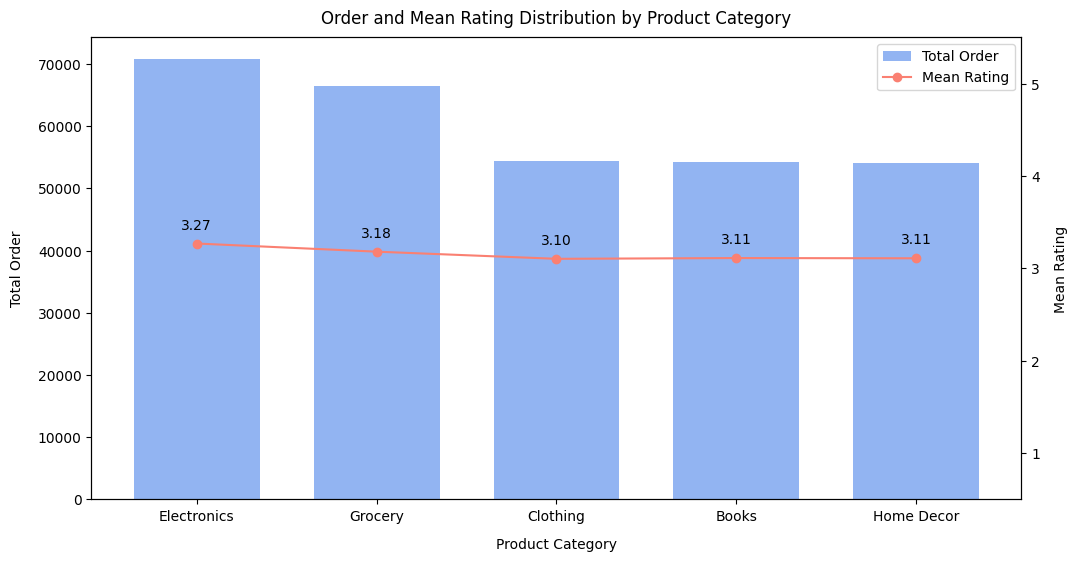

In [90]:
_, ax1 = plt.subplots(figsize = (12, 6))

# Vẽ biểu đồ cột cho số lượng đơn hàng
ax1.bar(df_rating_category['Product_Category'], df_rating_category['Total'], color = 'cornflowerblue', width = 0.7, label = 'Total Order', alpha = 0.7)
ax1.set_xlabel('Product Category', labelpad = 10)
ax1.set_ylabel('Total Order', labelpad = 10)
ax1.set_xticks(ticks = range(len(df_rating_category)), labels = df_rating_category['Product_Category'], rotation = 0)

# Tạo một trục y thứ hai cho doanh thu
ax2 = ax1.twinx()
ax2.plot(df_rating_category['Product_Category'], df_rating_category['Mean_Rating'], color = 'salmon', marker = 'o', label = 'Mean Rating')
ax2.set_ylabel('Mean Rating', labelpad = 10)
ax2.set_ylim((0.5, 5.5))

for i in range(len(df_rating_category)):
    ax2.text(df_rating_category['Product_Category'][i], df_rating_category['Mean_Rating'][i] + 0.2
             , f'{df_rating_category["Mean_Rating"][i]:.2f}',
             ha = 'center', va = 'center', fontsize = 10)

plt.title('Order and Mean Rating Distribution by Product Category', pad = 10)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2)
# plt.xticks(rotation = 90)

plt.show()

---
2. Độ tuổi và thu nhập có ảnh hưởng đến Rating không?

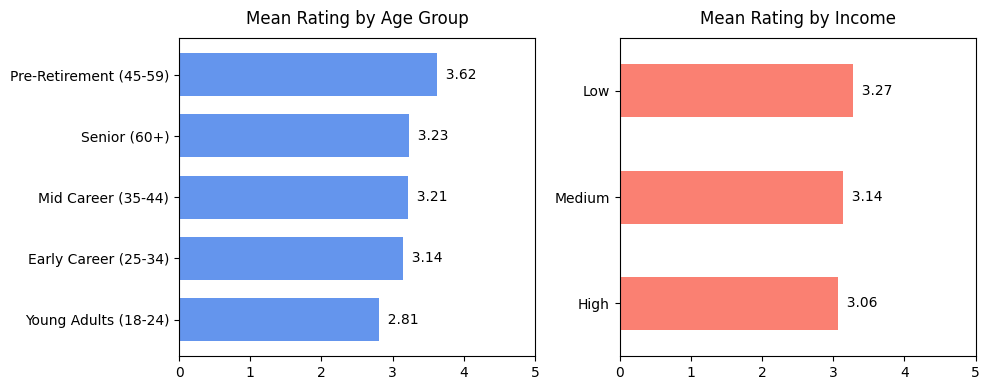

In [91]:
_, ax = plt.subplots(1, 2, figsize = (10, 4))
x_ticks = range(0, 6)

df_age_rating = (df_retail.groupby('Age_Group', observed = True).agg(Mean_Rating = ('Ratings', 'mean'))).sort_values('Mean_Rating')

# Vẽ biểu đồ cột (bar chart)
df_age_rating.plot(kind = 'barh', color = 'cornflowerblue', width = 0.7, ax = ax[0], legend = False)

ax[0].set_title('Mean Rating by Age Group', pad = 10)
ax[0].set_xlabel('', labelpad = 10)
ax[0].set_ylabel('', labelpad = 10)
ax[0].set_xticks(x_ticks)

# Thêm chú thích số liệu dạng % cho từng cột
for index, value in enumerate(df_age_rating['Mean_Rating']):
    ax[0].text(value, index, f'  {value:.2f}', ha = 'left', va = 'center')

df_income_rating = (df_retail.groupby('Income', observed = True).agg(Mean_Rating = ('Ratings', 'mean'))).sort_values('Mean_Rating')

# Vẽ biểu đồ cột (bar chart)
df_income_rating.plot(kind = 'barh', color = 'salmon', ax = ax[1], legend = False)

ax[1].set_title('Mean Rating by Income', pad = 10)
ax[1].set_xlabel('', labelpad = 10)
ax[1].set_ylabel('', labelpad = 10)
ax[1].set_xticks(x_ticks)

# Thêm chú thích số liệu dạng % cho từng cột
for index, value in enumerate(df_income_rating['Mean_Rating']):
    ax[1].text(value, index, f'  {value:.2f}', ha = 'left', va = 'center')

# plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

### **Customer Feedback**

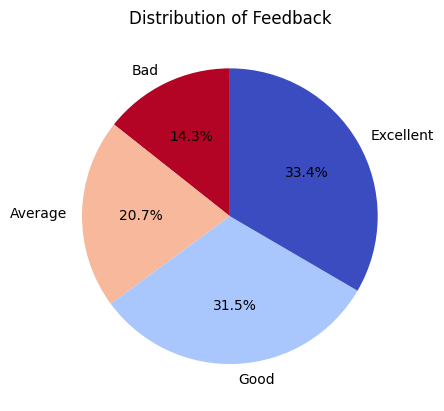

In [92]:
feedback_count = df_retail.groupby('Feedback', observed = True).size().reset_index(name = 'Count')
feedback_count = feedback_count.sort_values('Count', ascending = True)

cmap = plt.get_cmap('coolwarm_r')
colors = cmap(np.linspace(0, 1, len(feedback_count)))

# Vẽ biểu đồ tròn (pie chart)
plt.pie(feedback_count['Count'], autopct = '%1.1f%%', colors = colors, startangle = 90, labels = feedback_count['Feedback'])

plt.title('Distribution of Feedback')
plt.show()

1. Theo thời gian thì phản hồi của khách hàng có tốt hơn không?

In [93]:
df_feedback_time = df_retail.groupby(['Year_Month', 'Feedback'], observed = True).size().reset_index(name = 'Total_Feedback')
df_feedback_time.head(10)

,Year_Month,Feedback,Total_Feedback
0,2023-03,Bad,3635
1,2023-03,Average,5302
2,2023-03,Good,8010
3,2023-03,Excellent,8491
4,2023-04,Bad,3501
5,2023-04,Average,5090
6,2023-04,Good,7757
7,2023-04,Excellent,8257
8,2023-05,Bad,3611
9,2023-05,Average,5238


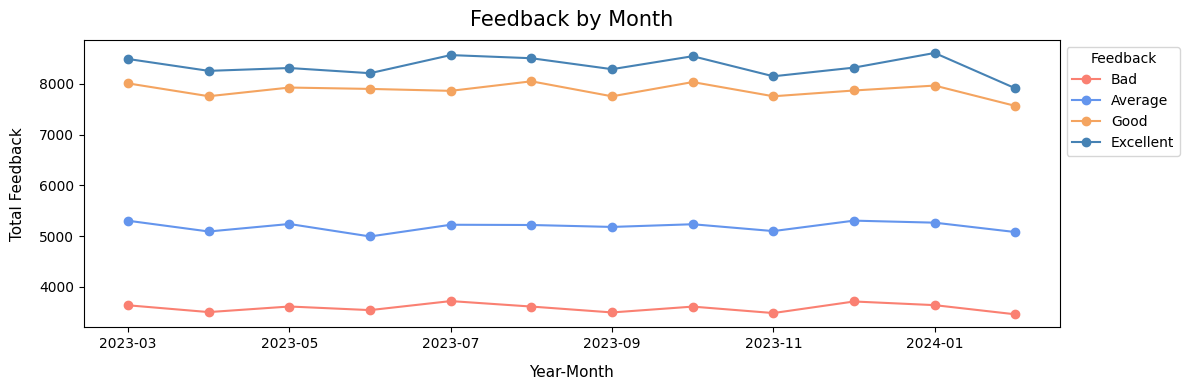

In [94]:
_, ax = plt.subplots(figsize = (12, 4))

# Vẽ biểu đồ đường (line chart)
df_bad = df_feedback_time[df_feedback_time['Feedback'] == 'Bad']
df_bad.plot(x = 'Year_Month', y = 'Total_Feedback', kind = 'line', color = 'salmon', marker = 'o', ax = ax, label = 'Bad')

df_average = df_feedback_time[df_feedback_time['Feedback'] == 'Average']
df_average.plot(x = 'Year_Month', y = 'Total_Feedback', kind = 'line', color = 'cornflowerblue', marker = 'o', ax = ax, label = 'Average')

df_good = df_feedback_time[df_feedback_time['Feedback'] == 'Good']
df_good.plot(x = 'Year_Month', y = 'Total_Feedback', kind = 'line', color = 'sandybrown', marker = 'o', ax = ax, label = 'Good')

df_excellent = df_feedback_time[df_feedback_time['Feedback'] == 'Excellent']
df_excellent.plot(x = 'Year_Month', y = 'Total_Feedback', kind = 'line', color = 'steelblue', marker = 'o', ax = ax, label = 'Excellent')

ax.set_title('Feedback by Month', pad = 10, fontsize = 15)
ax.set_xlabel('Year-Month', labelpad = 10, fontsize = 11)
ax.set_ylabel('Total Feedback', labelpad = 10, fontsize = 11)
# ax.set_ylim(top = df_feedback_time['Total_Feedback'].max() + 1000, bottom = 0)
# ax.set_xticks(ticks = range(df_feedback_time['Year_Month'].nunique())
#             , labels = df_feedback_time['Year_Month'].drop_duplicates(), rotation = 0)

plt.legend(title = 'Feedback', bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.show()

---
2. Hồ sơ khách hàng có ảnh hưởng đến Feedback không?

In [95]:
df_feedback_segment = pd.crosstab(df_retail['Customer_Segment'], df_retail['Feedback'])
df_feedback_segment

Feedback,Bad,Average,Good,Excellent
Customer_Segment,,,,
New,12730,18135,27733,32017
Regular,24290,32535,45462,43001
Premium,5985,11551,21265,25158


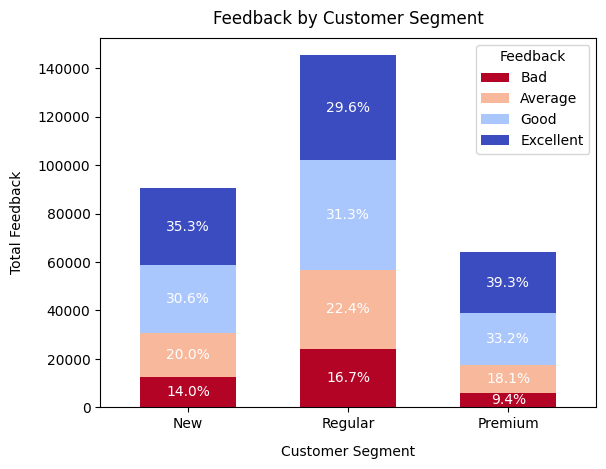

In [96]:
# Vẽ biểu đồ cột chồng (stacked bar chart)
df_feedback_segment.plot(kind = 'bar', stacked = True, cmap = 'coolwarm_r', width = 0.6)

for i, segment in enumerate(df_feedback_segment.index):
    start = 0
    total = df_feedback_segment.loc[segment].sum()
    for j, feedback in enumerate(df_feedback_segment.columns):
        value = df_feedback_segment.loc[segment, feedback]
        if value > 0:
            per = value / total * 100
            plt.text(i, start + value / 2, f'{per:.1f}%', ha = 'center', va = 'center', color = 'white')
            start += value

plt.title('Feedback by Customer Segment', pad = 10)
plt.xlabel('Customer Segment', labelpad = 10)
plt.ylabel('Total Feedback', labelpad = 10)

plt.xticks(rotation = 0)
plt.show()

---
3. Phương thức giao hàng có ảnh hưởng đến Feedback không?

In [97]:
df_feedback_shipping = pd.crosstab(df_retail['Shipping_Method'], df_retail['Feedback'])
df_feedback_shipping

Feedback,Bad,Average,Good,Excellent
Shipping_Method,,,,
Express,14942,21187,32542,33032
Same-Day,14126,20778,32990,35674
Standard,13937,20256,28928,31470


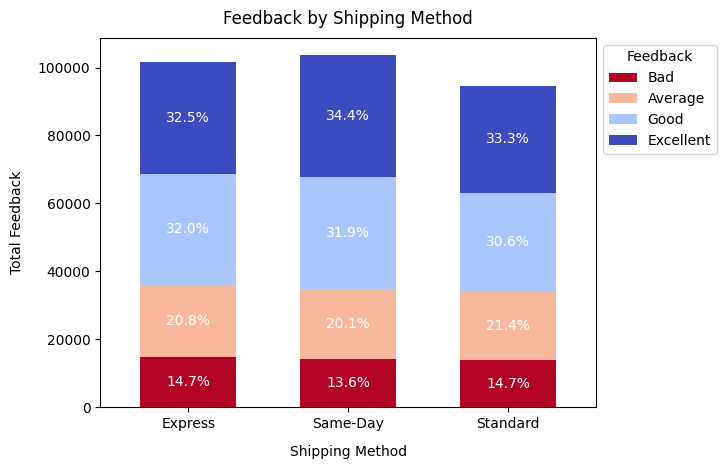

In [98]:
# Vẽ biểu đồ cột chồng (stacked bar chart)
df_feedback_shipping.plot(kind = 'bar', stacked = True, cmap = 'coolwarm_r', width = 0.6)

for i, method in enumerate(df_feedback_shipping.index):
    start = 0
    total = df_feedback_shipping.loc[method].sum()
    for j, feedback in enumerate(df_feedback_shipping.columns):
        value = df_feedback_shipping.loc[method, feedback]
        if value > 0:
            per = value / total * 100
            plt.text(i, start + value / 2, f'{per:.1f}%', ha = 'center', va = 'center', color = 'white')
            start += value

plt.title('Feedback by Shipping Method', pad = 10)
plt.xlabel('Shipping Method', labelpad = 10)
plt.ylabel('Total Feedback', labelpad = 10)

plt.xticks(rotation = 0)
plt.legend(title = 'Feedback', bbox_to_anchor = (1, 1))
plt.show()

---
4. Địa lý và giới tính có ảnh hưởng đến Feedback không?

In [99]:
df_feedback_country = pd.crosstab(df_retail['Country'], df_retail['Feedback'])
df_feedback_country

Feedback,Bad,Average,Good,Excellent
Country,,,,
Australia,5390,8864,13821,17000
Canada,5477,8757,13930,16879
Germany,7379,10540,15804,18752
United Kingdom,9835,13204,18290,21360
United States,14924,20856,32615,26185


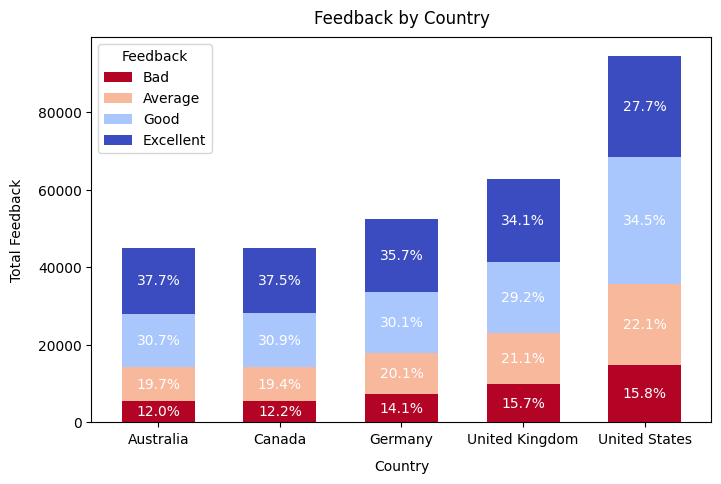

In [100]:
_, ax = plt.subplots(figsize = (8, 5))

# Vẽ biểu đồ cột chồng (stacked bar chart)
df_feedback_country.plot(kind = 'bar', stacked = True, cmap = 'coolwarm_r', width = 0.6, ax = ax)

for i, country in enumerate(df_feedback_country.index):
    start = 0
    total = df_feedback_country.loc[country].sum()
    for j, feedback in enumerate(df_feedback_country.columns):
        value = df_feedback_country.loc[country, feedback]
        if value > 0:
            per = value / total * 100
            ax.text(i, start + value / 2, f'{per:.1f}%', ha = 'center', va = 'center', color = 'white')
            start += value

ax.set_title('Feedback by Country', pad = 10)
ax.set_xlabel('Country', labelpad = 10)
ax.set_ylabel('Total Feedback', labelpad = 10)

plt.xticks(rotation = 0)
# plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [101]:
df_feedback_gender = pd.crosstab(df_retail['Gender'], df_retail['Feedback'])
df_feedback_gender

Feedback,Bad,Average,Good,Excellent
Gender,,,,
Female,16825,23578,33304,39720
Male,26180,38643,61156,60456


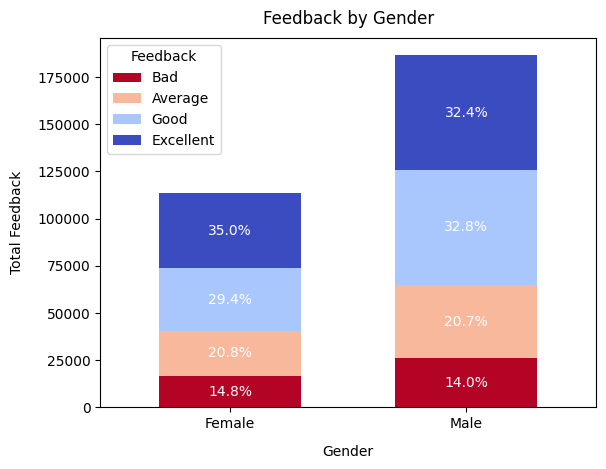

In [102]:
# Vẽ biểu đồ cột chồng (stacked bar chart)
df_feedback_gender.plot(kind = 'bar', stacked = True, cmap = 'coolwarm_r', width = 0.6)

for i, gender in enumerate(df_feedback_gender.index):
    start = 0
    total = df_feedback_gender.loc[gender].sum()
    for j, feedback in enumerate(df_feedback_gender.columns):
        value = df_feedback_gender.loc[gender, feedback]
        if value > 0:
            per = value / total * 100
            plt.text(i, start + value / 2, f'{per:.1f}%', ha = 'center', va = 'center', color = 'white')
            start += value

plt.title('Feedback by Gender', pad = 10)
plt.xlabel('Gender', labelpad = 10)
plt.ylabel('Total Feedback', labelpad = 10)

plt.xticks(rotation = 0)
plt.show()

In [104]:
df_retail

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month_Name,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,Product,Age_Group,Month,Day_Name,Year_Month,Hour
0,37249,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5,Cycling shorts,Young Adults (18-24),9,Monday,2023-09,22
1,69749,United Kingdom,19,Female,Low,Premium,2023-12-31,2023,December,08:42:04,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4,Lenovo Tab,Young Adults (18-24),12,Sunday,2023-12,8
2,30192,Australia,48,Male,Low,Regular,2023-04-26,2023,April,04:06:29,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2,Sports equipment,Pre-Retirement (45-59),4,Wednesday,2023-04,4
3,62101,Canada,56,Male,High,Premium,2023-05-08,2023,May,14:55:17,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4,Utility knife,Pre-Retirement (45-59),5,Monday,2023-05,14
4,27901,United Kingdom,22,Male,Low,Premium,2024-01-10,2024,January,16:54:07,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1,Chocolate cookies,Young Adults (18-24),1,Wednesday,2024-01,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299857,12104,Australia,31,Male,Medium,Regular,2024-01-20,2024,January,23:40:29,5,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,1,Historical fiction,Early Career (25-34),1,Saturday,2024-01,23
299858,69772,Germany,35,Female,Low,New,2023-12-28,2023,December,02:55:45,1,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,5,LG Gram,Mid Career (35-44),12,Thursday,2023-12,2
299859,28449,United Kingdom,41,Male,Low,Premium,2024-02-27,2024,February,02:43:49,3,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,2,Parka,Mid Career (35-44),2,Tuesday,2024-02,2
299860,45477,Canada,41,Male,Medium,New,2023-09-03,2023,September,11:20:31,1,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,4,TV stand,Mid Career (35-44),9,Sunday,2023-09,11


In [105]:
df_retail.to_csv('/content/drive/MyDrive/Customer-Purchase-Behavior/Dataset/retail-transaction.csv', index = False)

In [106]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299862 entries, 0 to 299861
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer_ID       299862 non-null  object        
 1   Country           299862 non-null  object        
 2   Age               299862 non-null  int64         
 3   Gender            299862 non-null  object        
 4   Income            299862 non-null  category      
 5   Customer_Segment  299862 non-null  category      
 6   Date              299862 non-null  datetime64[ns]
 7   Year              299862 non-null  int64         
 8   Month_Name        299862 non-null  object        
 9   Time              299862 non-null  object        
 10  Total_Purchases   299862 non-null  int64         
 11  Amount            299862 non-null  float64       
 12  Total_Amount      299862 non-null  float64       
 13  Product_Category  299862 non-null  object        
 14  Prod